## Assignment1: Lending Club Case Study

## Team Members:
    > Deepak Hiremath
    > Ebino Reji

## Problem Statement

### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
  

### Business 
Understanding You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. 
> The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

> In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


## Steps Performed:
1. Performed below steps in data cleaning:
    * Drop columns which had null values
    * Drop columns which had single category
    * Data Standardization 
    * Drop Columns which are not required for current study
    * Deriving new columns


2. Performed below steps in EDA:
    * Univariate Analysis
    * Segmented Univariate Analysis
    * Bivariate Analysis

# Exploratory Data Analysis

### Data Files :
    > loan.csv : loan details of all the loans issued for a certain period.
    > Data_Dictionary: meaning of each field in above file.

In [699]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [700]:
# Reading main file
main_df = pd.read_csv("loan.csv", index_col=False, low_memory=False)
pd.set_option('display.max_rows', 500)

In [701]:
main_df.shape

(39717, 111)

In [702]:
main_df.describe()

id      member_id    loan_amnt  funded_amnt  \
count   39717.000000   39717.000000 39717.000000 39717.000000   
mean   683131.913060  850463.559408 11219.443815 10947.713196   
std    210694.132915  265678.307421  7456.670694  7187.238670   
min     54734.000000   70699.000000   500.000000   500.000000   
25%    516221.000000  666780.000000  5500.000000  5400.000000   
50%    665665.000000  850812.000000 10000.000000  9600.000000   
75%    837755.000000 1047339.000000 15000.000000 15000.000000   
max   1077501.000000 1314167.000000 35000.000000 35000.000000   

       funded_amnt_inv  installment     annual_inc          dti  delinq_2yrs  \
count     39717.000000 39717.000000   39717.000000 39717.000000 39717.000000   
mean      10397.448868   324.561922   68968.926377    13.315130     0.146512   
std        7128.450439   208.874874   63793.765790     6.678594     0.491812   
min           0.000000    15.690000    4000.000000     0.000000     0.000000   
25%        5000.000000   167.020000   40404.000000     8.170000     0.000000   
50%        8975.000000   280.220000   59000.000000    13.400000     0.000000   
75%       14400.000000   430.780000   82300.000000    18.600000     0.000000   
max       35000.000000  1305.190000 6000000.000000    29.990000    11.000000   

       inq_last_6mths  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m  \
count    39717.000000  ...            0.000000            0.000000   
mean         0.869200  ...                 NaN                 NaN   
std          1.070219  ...                 NaN                 NaN   
min          0.000000  ...                 NaN                 NaN   
25%          0.000000  ...                 NaN                 NaN   
50%          1.000000  ...                 NaN                 NaN   
75%          1.000000  ...                 NaN                 NaN   
max          8.000000  ...                 NaN                 NaN   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies    tax_liens  \
count        0.000000          0.000000          39020.000000 39678.000000   
mean              NaN               NaN              0.043260     0.000000   
std               NaN               NaN              0.204324     0.000000   
min               NaN               NaN              0.000000     0.000000   
25%               NaN               NaN              0.000000     0.000000   
50%               NaN               NaN              0.000000     0.000000   
75%               NaN               NaN              0.000000     0.000000   
max               NaN               NaN              2.000000     0.000000   

       tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count         0.000000           0.000000        0.000000   
mean               NaN                NaN             NaN   
std                NaN                NaN             NaN   
min                NaN                NaN             NaN   
25%                NaN                NaN             NaN   
50%                NaN                NaN             NaN   
75%                NaN                NaN             NaN   
max                NaN                NaN             NaN   

       total_il_high_credit_limit  
count                    0.000000  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN  

[8 rows x 87 columns]

### Data Cleaning

In [703]:
# While doing basic analysis we have seen there are fields with no data, so calculating the missing values in each column in percentage

missing_values_percentage = round((main_df.isnull().sum()/len(main_df.id))*100, 2)

In [704]:
missing_values_percentage.sort_values(inplace=True)
missing_values_percentage.loc[null_data > 0]

last_credit_pull_d                 0.010000
title                              0.030000
tax_liens                          0.100000
revol_util                         0.130000
collections_12_mths_ex_med         0.140000
chargeoff_within_12_mths           0.140000
last_pymnt_d                       0.180000
pub_rec_bankruptcies               1.750000
emp_length                         2.710000
emp_title                          6.190000
desc                              32.580000
mths_since_last_delinq            64.660000
mths_since_last_record            92.990000
next_pymnt_d                      97.130000
num_bc_sats                      100.000000
mths_since_recent_bc             100.000000
mths_since_recent_bc_dlq         100.000000
mths_since_recent_inq            100.000000
mths_since_recent_revol_delinq   100.000000
num_accts_ever_120_pd            100.000000
num_actv_bc_tl                   100.000000
num_actv_rev_tl                  100.000000
mort_acc                        

In [705]:
# There are fields in data with more than 60% of null valaues, these fields are not needed, will try to remove them and see how the data looks like

In [706]:
missing_fields = missing_values_percentage[missing_values_percentage>60]
len(missing_fields)

57

In [707]:
#there are 57 columns with more than 60% missing values to be dropped

In [708]:
missing_fields_columns = list(missing_fields.index)

In [709]:
loan_df = main_df.drop(columns=missing_fields_columns, axis=1)

In [710]:
loan_df.shape

(39717, 54)

In [711]:
# list of columns which are not useful in the current analysis [URL, desc, zip_code(state is available)]
# URL : URL for the LC page with listing data.
# desc : Loan description provided by the borrower
# zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.

loan_df = loan_df.drop(columns=['url', 'desc', 'zip_code'], axis=1)

In [712]:
loan_df.shape

(39717, 51)

#### Finding Categorical Fields  

In [713]:
# uniqueness calculation helps me find the catogorical variables
unique_values = [{'column_name':row, 'unique_length':len(loan_df[row].unique()), 'unique_values':loan_df[row].unique()} for row in loan_df.columns.to_list()]

In [714]:
unique_values_sorted = pd.DataFrame(unique_values).sort_values('unique_length')

In [715]:
unique_values_sorted

column_name  unique_length  \
30         initial_list_status              1   
48                 delinq_amnt              1   
17                  pymnt_plan              1   
46              acc_now_delinq              1   
45            application_type              1   
44                 policy_code              1   
43  collections_12_mths_ex_med              2   
50                   tax_liens              2   
47    chargeoff_within_12_mths              2   
5                         term              2   
14         verification_status              3   
16                 loan_status              3   
49        pub_rec_bankruptcies              4   
12              home_ownership              5   
26                     pub_rec              5   
8                        grade              7   
24              inq_last_6mths              9   
22                 delinq_2yrs             11   
11                  emp_length             12   
18                     purpose             14   
9                    sub_grade             35   
25                    open_acc             40   
20                  addr_state             50   
15                     issue_d             55   
29                   total_acc             82   
40                last_pymnt_d            102   
42          last_credit_pull_d            107   
6                     int_rate            371   
23            earliest_cr_line            526   
2                    loan_amnt            885   
3                  funded_amnt           1041   
28                  revol_util           1090   
31                   out_prncp           1137   
32               out_prncp_inv           1138   
37          total_rec_late_fee           1356   
39     collection_recovery_fee           2616   
21                         dti           2868   
38                  recoveries           4040   
13                  annual_inc           5318   
35             total_rec_prncp           7976   
4              funded_amnt_inv           8205   
7                  installment          15383   
19                       title          19616   
27                   revol_bal          21711   
10                   emp_title          28821   
41             last_pymnt_amnt          34930   
36               total_rec_int          35148   
34             total_pymnt_inv          37518   
33                 total_pymnt          37850   
1                    member_id          39717   
0                           id          39717   

                                        unique_values  
30                                                [f]  
48                                                [0]  
17                                                [n]  
46                                                [0]  
45                                       [INDIVIDUAL]  
44                                                [1]  
43                                         [0.0, nan]  
50                                         [0.0, nan]  
47                                         [0.0, nan]  
5                            [ 36 months,  60 months]  
14          [Verified, Source Verified, Not Verified]  
16                 [Fully Paid, Charged Off, Current]  
49                               [0.0, 1.0, 2.0, nan]  
12                 [RENT, OWN, MORTGAGE, OTHER, NONE]  
26                                    [0, 1, 2, 3, 4]  
8                               [B, C, A, E, F, D, G]  
24                        [1, 5, 2, 0, 3, 4, 6, 7, 8]  
22                 [0, 2, 3, 1, 4, 6, 5, 8, 7, 9, 11]  
11  [10+ years, < 1 year, 1 year, 3 years, 8 years...  
18  [credit_card, car, small_business, other, wedd...  
9   [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...  
25  [3, 2, 10, 15, 9, 7, 4, 11, 14, 12, 20, 8, 6, ...  
20  [AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, F...  
15  [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...  
29  [9, 4, 10, 37, 38, 12, 11, 13, 3, 23, 34, 29, ...  
40  [Jan-15, A

In [716]:
# We observe there are fields with only 1 unique value initial_list_status, delinq_amnt, pymnt_plan, acc_now_delinq, application_type,policy_code.
# the above mentioned columns will not help us in current study so dropping them.
# The Columns collections_12_mths_ex_med, tax_liens, chargeoff_within_12_mths have 2 unique values and they are 0 and nulls so dropping them as of now, if required I will add them later.
# We can also drop column id, member_id


In [717]:
columns_drop_list = ['collections_12_mths_ex_med','tax_liens','chargeoff_within_12_mths','initial_list_status','delinq_amnt','pymnt_plan','acc_now_delinq','application_type','policy_code','id','member_id']
loan_df.drop(columns_drop_list, axis=1, inplace=True)

In [718]:
loan_df.shape

(39717, 40)

In [719]:
missing_rows = round(100*(loan_df.isnull().sum()/len(loan_df.loan_amnt)), 2) 

In [720]:
missing_rows[missing_rows > 0]

emp_title              6.190000
emp_length             2.710000
title                  0.030000
revol_util             0.130000
last_pymnt_d           0.180000
last_credit_pull_d     0.010000
pub_rec_bankruptcies   1.750000
dtype: float64

In [721]:
# There are missing values in columns emp_title, emp_length, pub_rec_bankruptcies
# > understanding what these columns are :
#    pub_rec_bankruptcies	Number of public record bankruptcies
#    emp_title	The job title supplied by the Borrower when applying for the loan
#    emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

# These fields are required, there might be a co-relation with defaulted loans and bankruptcies filed, emp_title, emp_length
# Clean the missing rows of these 3 columns to avoid any errors due to blank rows

In [722]:
loan_df = loan_df[~loan_df['emp_title'].isnull()]

In [723]:
loan_df = loan_df[~loan_df['emp_length'].isnull()]

In [724]:
loan_df = loan_df[~loan_df['pub_rec_bankruptcies'].isnull()]

In [725]:
loan_df = loan_df[~loan_df['title'].isnull()]

In [726]:
loan_df = loan_df[~loan_df['revol_util'].isnull()]

In [727]:
loan_df = loan_df[~loan_df['last_pymnt_d'].isnull()]

In [728]:
loan_df = loan_df[~loan_df['emp_length'].isnull()]

In [729]:
loan_df.shape

(36433, 40)

###### Removing unwanted data from columns and creating new columns

In [730]:
# columns with special charactors [term, int_rate, emp_length, revol_util]

loan_df['term_months'] = loan_df['term'].str.rstrip('months') #  36 months -> 36
del loan_df['term']

In [731]:
loan_df['int_rate_percentage'] = loan_df['int_rate'].str.rstrip('%') # 10.65% -> 10.65
del loan_df['int_rate']

In [732]:
loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip(' years') # 10 years -> 10
loan_df['emp_length_years'] = loan_df['emp_length_years'].str.rstrip('year') #1 year -> 1
loan_df['emp_length_years'].replace({'10+':'10'}, inplace=True) # considering 10+ years experience people as 10 years

In [733]:
loan_df['emp_length_years'].replace({'< 1':'0.5'}, inplace=True) #consodering all borrowers who has less than 1 year of employment as 0.5 years experience people

In [734]:
del loan_df['emp_length']

In [735]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment grade sub_grade  \
1       2500         2500      2500.000000    59.830000     C        C4   
3      10000        10000     10000.000000   339.310000     C        C1   
4       3000         3000      3000.000000    67.790000     B        B5   
5       5000         5000      5000.000000   156.460000     A        A4   
6       7000         7000      7000.000000   170.080000     C        C5   

                   emp_title home_ownership   annual_inc verification_status  \
1                      Ryder           RENT 30000.000000     Source Verified   
3        AIR RESOURCES BOARD           RENT 49200.000000     Source Verified   
4   University Medical Group           RENT 80000.000000     Source Verified   
5       Veolia Transportaton           RENT 36000.000000     Source Verified   
6  Southern Star Photography           RENT 47004.000000        Not Verified   

   ... total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
1  ...           0.000000 117.080000                1.110000       Apr-13   
3  ...          16.970000   0.000000                0.000000       Jan-15   
4  ...           0.000000   0.000000                0.000000       May-16   
5  ...           0.000000   0.000000                0.000000       Jan-15   
6  ...           0.000000   0.000000                0.000000       May-16   

  last_pymnt_amnt  last_credit_pull_d  pub_rec_bankruptcies term_months  \
1      119.660000              Sep-13              0.000000         60    
3      357.480000              Apr-16              0.000000         36    
4       67.790000              May-16              0.000000         60    
5      161.030000              Jan-16              0.000000         36    
6     1313.760000              May-16              0.000000         60    

   int_rate_percentage  emp_length_years  
1                15.27               0.5  
3                13.49                10  
4                12.69                 1  
5                 7.90                 3  
6                15.96                 8  

[5 rows x 40 columns]

    > Information of data 

In [736]:
loan_df.shape

(36433, 40)

##### Deriving new Columns from exisitng data

In [737]:
# We found that some columns have merged data, example : 'last_pymnt_d' column -> 'Jan-85' which can be split into Month and Year 
loan_df['last_pymnt_d_month'], loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].str.split('-').str

<ipython-input-737-d1bd6dd46491>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['last_pymnt_d_month'], loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].str.split('-').str


In [738]:
loan_df['earliest_cr_line_month'], loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str
loan_df['last_credit_pull_d_month'], loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].str.split('-').str
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str

<ipython-input-738-b5ca06ec1174>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['earliest_cr_line_month'], loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str
<ipython-input-738-b5ca06ec1174>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['last_credit_pull_d_month'], loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].str.split('-').str
<ipython-input-738-b5ca06ec1174>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str


In [739]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 36433 non-null  int64  
 1   funded_amnt               36433 non-null  int64  
 2   funded_amnt_inv           36433 non-null  float64
 3   installment               36433 non-null  float64
 4   grade                     36433 non-null  object 
 5   sub_grade                 36433 non-null  object 
 6   emp_title                 36433 non-null  object 
 7   home_ownership            36433 non-null  object 
 8   annual_inc                36433 non-null  float64
 9   verification_status       36433 non-null  object 
 10  issue_d                   36433 non-null  object 
 11  loan_status               36433 non-null  object 
 12  purpose                   36433 non-null  object 
 13  title                     36433 non-null  object 
 14  addr_s

In [740]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment grade sub_grade  \
1       2500         2500      2500.000000    59.830000     C        C4   
3      10000        10000     10000.000000   339.310000     C        C1   
4       3000         3000      3000.000000    67.790000     B        B5   
5       5000         5000      5000.000000   156.460000     A        A4   
6       7000         7000      7000.000000   170.080000     C        C5   

                   emp_title home_ownership   annual_inc verification_status  \
1                      Ryder           RENT 30000.000000     Source Verified   
3        AIR RESOURCES BOARD           RENT 49200.000000     Source Verified   
4   University Medical Group           RENT 80000.000000     Source Verified   
5       Veolia Transportaton           RENT 36000.000000     Source Verified   
6  Southern Star Photography           RENT 47004.000000        Not Verified   

   ... int_rate_percentage emp_length_years last_pymnt_d_month  \
1  ...               15.27              0.5                Apr   
3  ...               13.49               10                Jan   
4  ...               12.69                1                May   
5  ...                7.90                3                Jan   
6  ...               15.96                8                May   

  last_pymnt_d_year earliest_cr_line_month  earliest_cr_line_year  \
1                13                    Apr                     99   
3                15                    Feb                     96   
4                16                    Jan                     96   
5                15                    Nov                     04   
6                16                    Jul                     05   

   last_credit_pull_d_month last_credit_pull_d_year  issue_d_month  \
1                       Sep                      13            Dec   
3                       Apr                      16            Dec   
4                       May                      16            Dec   
5                       Jan                      16            Dec   
6                       May                      16            Dec   

   issue_d_year  
1            11  
3            11  
4            11  
5            11  
6            11  

[5 rows x 48 columns]

In [741]:
# Observe that some years created are having only last 2 digits of year, so adding 20 to them
#loan_df['last_pymnt_d_year'] = '20' + loan_df['last_pymnt_d_year']

In [742]:
#loan_df['earliest_cr_line_year'] = '20' + loan_df['earliest_cr_line_year']
#loan_df['last_credit_pull_d_year'] = '20' + loan_df['last_credit_pull_d_year']
loan_df['issue_d_year'] = '20' + loan_df['issue_d_year']

##### Value Standardization

In [743]:
# Some Columns are dates but are displayed as object type in data, convering to datetime object
# [issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d]
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [744]:
#loan_df['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
loan_df['issue_d']= pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['earliest_cr_line']= pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df['last_pymnt_d']= pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df['last_credit_pull_d']= pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')

In [745]:
# Rounding some values to 2 decimals
loan_df.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
Name: total_pymnt, dtype: int64

In [746]:
loan_df.total_pymnt_inv.value_counts().tail()

12706.370000    1
7281.280000     1
6062.440000     1
8765.430000     1
7813.470000     1
Name: total_pymnt_inv, dtype: int64

In [747]:
loan_df.total_rec_int.value_counts().head()

1196.570000    26
717.950000     17
1784.230000    17
1148.140000    17
514.520000     15
Name: total_rec_int, dtype: int64

In [748]:
loan_df.total_rec_late_fee.value_counts().tail()

37.323504    1
14.977710    1
14.896508    1
14.971231    1
14.939744    1
Name: total_rec_late_fee, dtype: int64

In [749]:
loan_df.collection_recovery_fee.value_counts().tail()

1.577800      1
764.771000    1
7.320000      1
10.989000     1
118.141200    1
Name: collection_recovery_fee, dtype: int64

In [750]:
loan_df.total_pymnt = round(loan_df.total_pymnt, 2)
loan_df.total_rec_late_fee = round(loan_df.total_rec_late_fee, 2)
loan_df.collection_recovery_fee = round(loan_df.collection_recovery_fee, 2)

In [751]:
# Removing 2 columns funded_amnt_inv, funded_amnt as these are almost equal to loan amount 
loan_df = loan_df.drop(['funded_amnt','funded_amnt_inv'], axis=1)

In [752]:
#loan_df.to_csv("c:/Users/dhiremath/Documents/clean_loan_data.csv")
def percentage_loan_status():
    loan_status_count = loan_df.groupby(['loan_status'])['loan_status'].count()
    percecntage_charged_off = (loan_status_count['Charged Off']/(loan_status_count['Fully Paid']+loan_status_count['Charged Off'] + loan_status_count['Current']))*100
    percentage_fully_paid = (loan_status_count['Fully Paid']/(loan_status_count['Fully Paid']+loan_status_count['Charged Off'] + loan_status_count['Current']))*100
    
    return ({'percecntage_charged_off':percecntage_charged_off, 'percentage_fully_paid':percentage_fully_paid})

### Analysis

#### Univariate Analysis

In [753]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,10)})

>Field Loan Amount Borrowed

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

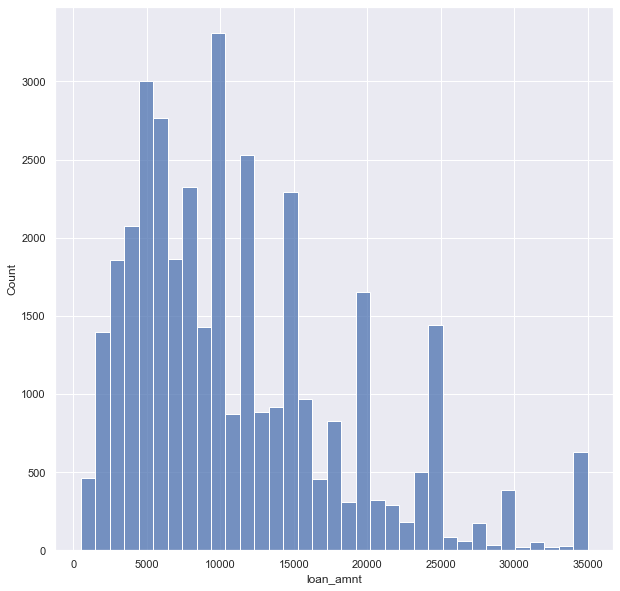

In [754]:
#Understanding the distribution, frequency of loan amount using histogram
sns.histplot(loan_df.loan_amnt, kde=False, bins=35)

    > max loan amount provided is 35000, most loans lies between 5000$ to 15000$ 

C:\Users\dhiremath\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

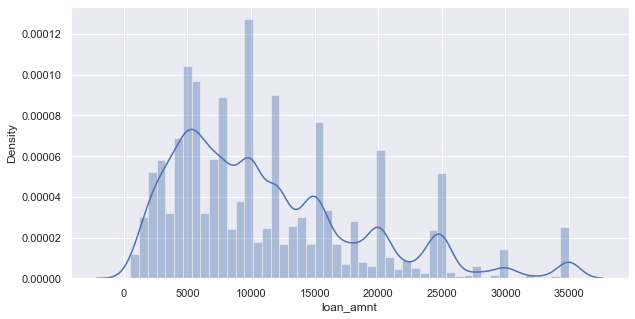

In [755]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.loan_amnt)

    > the density shows loan amount is inclined towards lesser amounts(5000 $), company has tried to give more loans of lesser amount.

<AxesSubplot:ylabel='loan_amnt'>

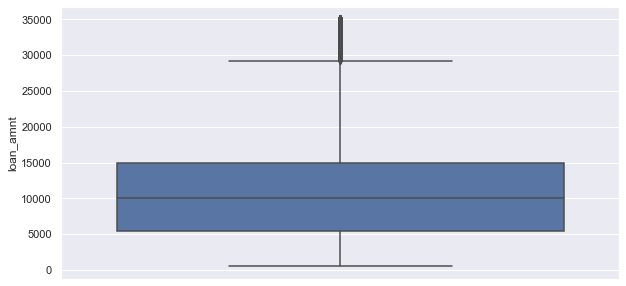

In [756]:
# Understanding the distribution of data using box plot
sns.boxplot(y=df.loan_amnt)

    > The box says max loan is 35000, median at 10000, IQR is between 5000 to 15000

> Field Loan Status 

In [757]:
# Understanding the loan status field
loan_df["loan_status"].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

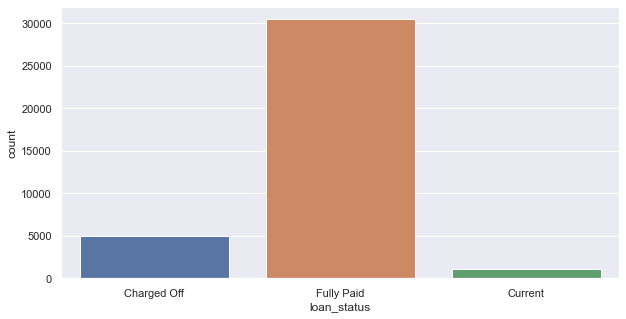

In [758]:
sns.countplot(x=loan_df.loan_status)

In [759]:
percentage_loan_status()

{'percecntage_charged_off': 13.567370241264786,
 'percentage_fully_paid': 83.50671094886503}

    > From the above plot we understand that totally there are 14 % of defaulters 

> Field Purpose of loan

In [760]:
# Understanding the purpose distribution
loan_df.purpose.value_counts()

debt_consolidation    17470
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

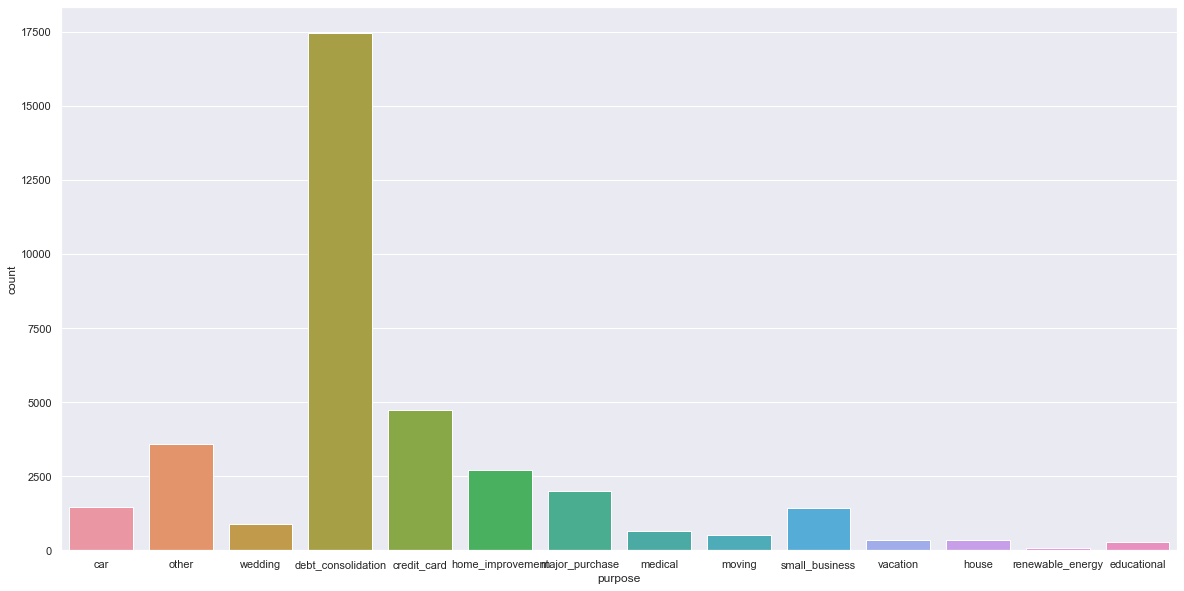

In [761]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=loan_df.purpose)

<AxesSubplot:xlabel='purpose', ylabel='count'>

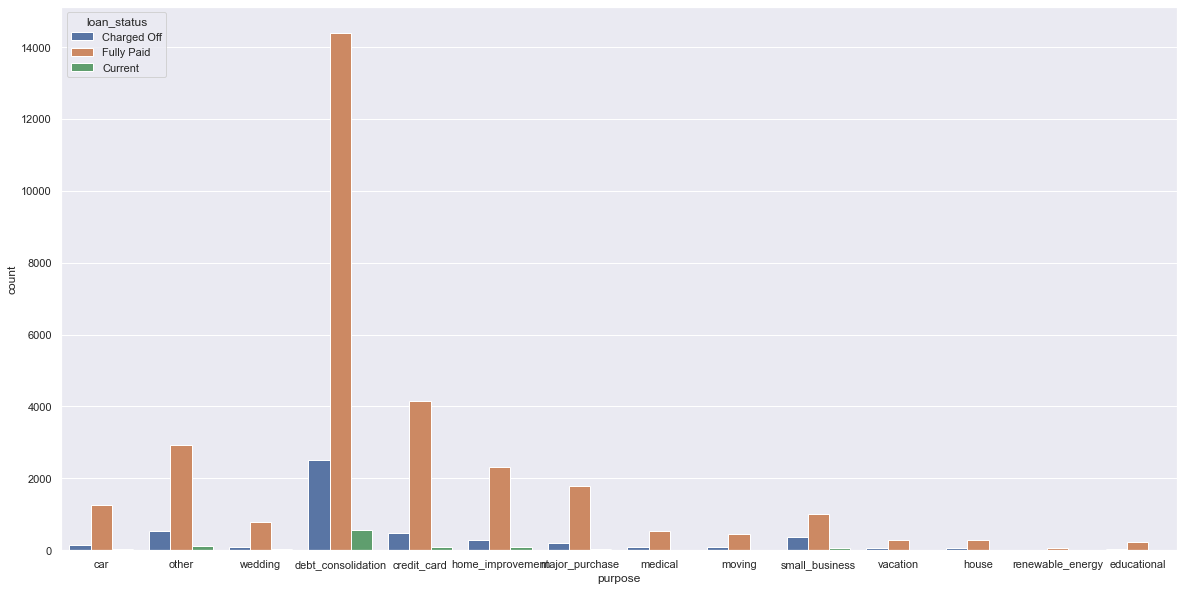

In [762]:
sns.countplot(x=loan_df.purpose, hue=loan_df.loan_status)

    > Around 47% loans are provided for debt_consolidation.

In [763]:
# This function will return the ChargedOff values in percentage againt any field
def percentage_chargedOff(new_df, field):
    grp = new_df.groupby(['loan_status', field])[field].count()
    cnt = new_df.groupby(field)[field].count()
    percentages_purpose = grp*100/cnt.T
    return percentages_purpose['Charged Off']

In [764]:
percentage_chargedOff(loan_df,'purpose')

purpose
car                  10.325710
credit_card          10.135421
debt_consolidation   14.361763
educational          16.304348
home_improvement     10.942699
house                15.160350
major_purchase        9.462151
medical              14.984227
moving               14.933837
other                15.272727
renewable_energy     17.045455
small_business       25.176803
vacation             14.583333
wedding               9.367946
Name: purpose, dtype: float64

Even though more loans are provided to debt_consolidation, the 25% defaulters under small_business loans.
The company should be very cautious while giving loans in this sector

> Field State

<AxesSubplot:xlabel='addr_state', ylabel='count'>

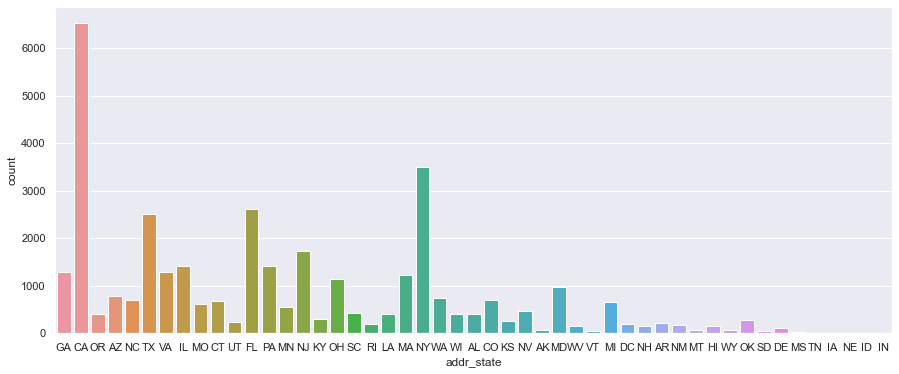

In [765]:
# Understanding the State wise distribution
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x = loan_df.addr_state)

    > Maximum loans are given in California state

<AxesSubplot:xlabel='emp_length_years', ylabel='count'>

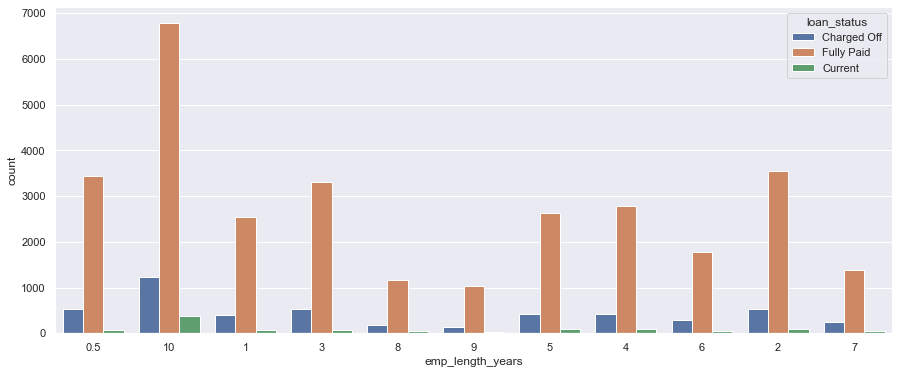

In [766]:
# Understanding the distribution of employee experience
sns.countplot(x=loan_df.emp_length_years, hue=loan_df.loan_status)

    > More loans are given to 10 years experinced people, more defaulters are also found in this group

<AxesSubplot:xlabel='addr_state', ylabel='count'>

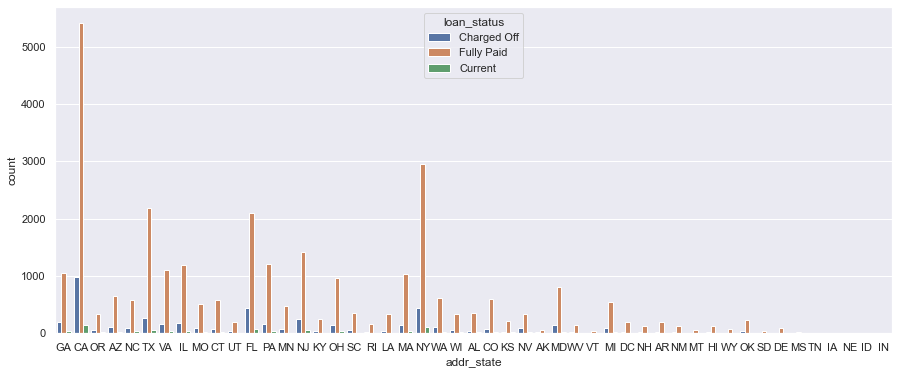

In [767]:
sns.countplot(x = loan_df.addr_state, hue=loan_df.loan_status)

Even though most loans are given in California, defaulters are high in Nevada 21%, Alaska 20%,  Tenessee 20%.
Company should be giving less loans in these states.

In [768]:
percentage_chargedOff(loan_df, 'addr_state')

addr_state
AK   20.000000
AL   11.380145
AR   11.111111
AZ   13.537676
CA   14.932681
CO   11.315417
CT   11.504425
DC    6.796117
DE   10.377358
FL   16.704893
GA   15.027111
HI   16.149068
IL   13.113604
KS    9.638554
KY   14.052288
LA   11.306533
MA   11.374795
MD   14.373717
MI   13.567073
MN   12.788632
MO   15.224359
MS    5.555556
MT   12.328767
NC   13.920455
NH   14.569536
NJ   14.857806
NM   16.766467
NV   21.086957
NY   12.535776
OH   12.126538
OK   13.074205
OR   15.291262
PA   11.291461
RI   13.227513
SC   13.793103
SD   17.543860
TN   20.000000
TX   10.850556
UT   14.102564
VA   12.490362
VT   12.500000
WA   14.844804
WI   12.068966
WV   12.422360
WY    3.846154
Name: addr_state, dtype: float64

> Field Grade of loans

<AxesSubplot:xlabel='grade', ylabel='count'>

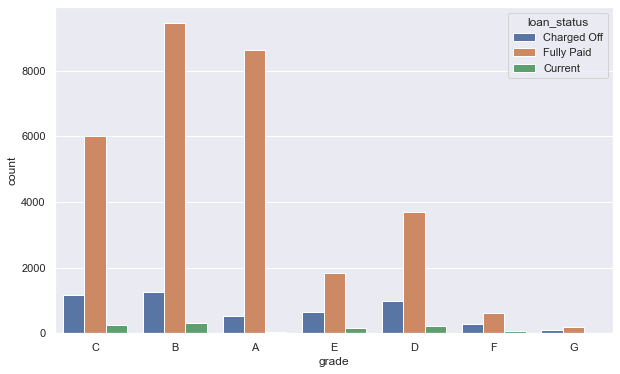

In [769]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=loan_df.grade, hue=loan_df.loan_status)

In [770]:
percentage_chargedOff(loan_df,'grade')

grade
A    5.591281
B   11.354780
C   15.744853
D   20.102564
E   24.452830
F   29.514964
G   31.208054
Name: grade, dtype: float64

    > More loans are given to grade A, B, C category customers. It is good for company as the probability of returning the loan is high.
    > The above plot also tells more defaulters are in B,C,D category
    > But the percentage of defaulters are more in G, F, E, D with 31%, 29%, 25%, 20% respectively.
    So company should decrease the loans to high risky borrowers

> Field Annual Income

<AxesSubplot:xlabel='annual_inc'>

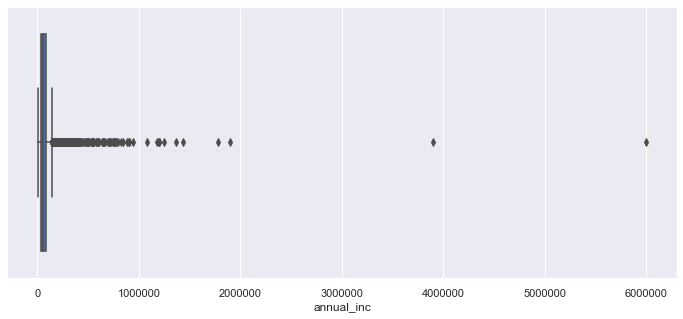

In [771]:
sns.set(rc={'figure.figsize':(12,5)})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=loan_df['annual_inc'])

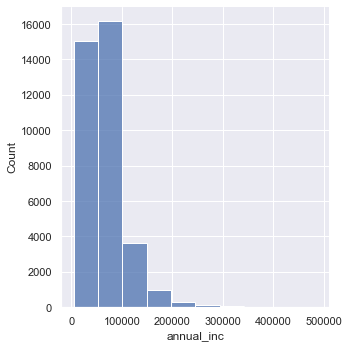

In [772]:
sns.displot(loan_df[loan_df['annual_inc']<500000]['annual_inc'], bins=10)

In [773]:
pd.set_option('float_format', '{:f}'.format)
loan_df.annual_inc.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

count     36433.000000
mean      69305.224255
std       63542.442054
min        4000.000000
10%       30000.000000
20%       38400.000000
30%       45000.000000
40%       51600.000000
50%       60000.000000
60%       66504.000000
70%       76308.000000
80%       90000.000000
max     6000000.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

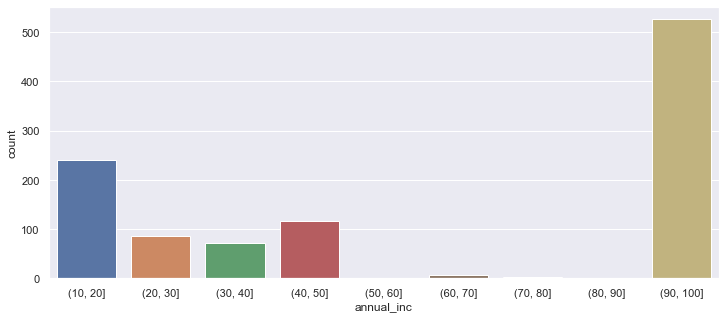

In [774]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.countplot(x = pd.cut(percentage_chargedOff(loan_df, 'annual_inc'), bins=bins))

    > The annual income of borrowers range between 4,000 to 6,000,000. Only 1 borrower has more than 4000000
    > Median annual income is around 60000, mean is at 69305
    > More people with less income have borrowed loans,  Most people have an annual income less than 90000
    > Defaulters are high at lower incomes, it is decreasing as income increases

>Field Verification Status of loans

<AxesSubplot:xlabel='verification_status', ylabel='count'>

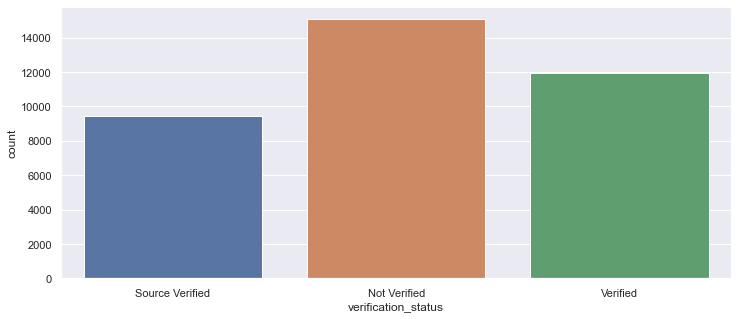

In [775]:
sns.countplot(x=loan_df.verification_status)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

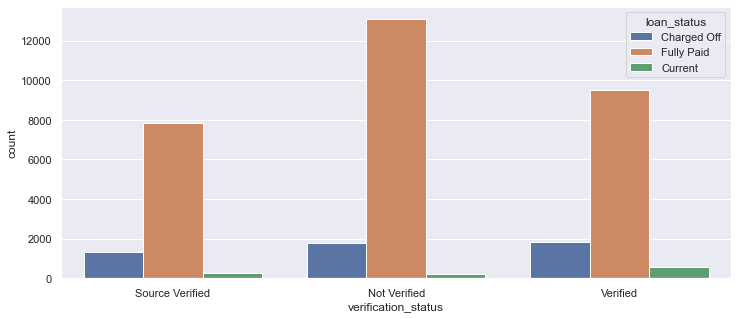

In [776]:
sns.countplot(x=loan_df.verification_status, hue=loan_df.loan_status)

In [777]:
percentage_chargedOff(loan_df, 'verification_status')

verification_status
Not Verified      11.756111
Source Verified   13.987938
Verified          15.520711
Name: verification_status, dtype: float64

    >'Sources Verified' and 'Verified' are same
    > There are many loans which were not verified
    > Over all charged off is higher in all cases

> Field dti: 
It's the borrowers 'Total Credits or Mortgages' // 'Total Income'

<AxesSubplot:xlabel='dti'>

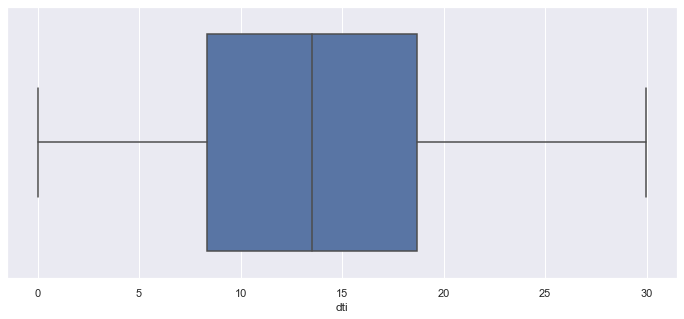

In [778]:
sns.set(rc={'figure.figsize':(12,5)})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=loan_df['dti'])

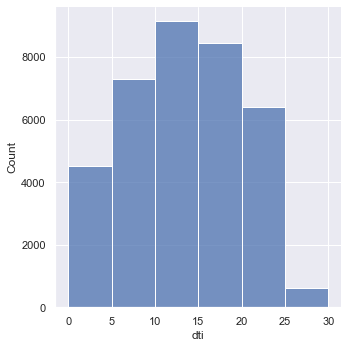

In [779]:
sns.displot(loan_df[loan_df['dti']<30]['dti'], bins=6)

In [780]:
loan_df.dti.describe()

count   36433.000000
mean       13.444131
std         6.643308
min         0.000000
25%         8.360000
50%        13.540000
75%        18.690000
max        29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='count'>

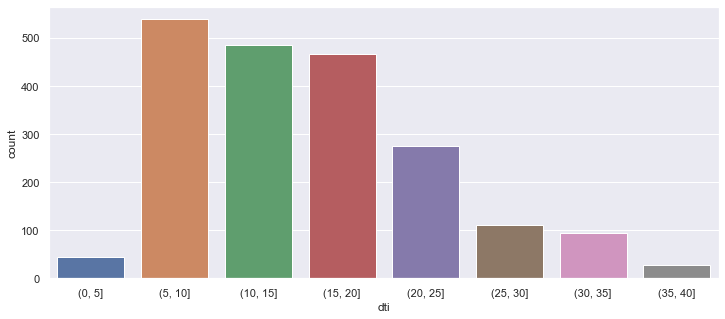

In [781]:
bins = [0,5,10,15,20,25,30,35,40]
sns.countplot(x = pd.cut(percentage_chargedOff(loan_df,'dti'), bins=bins))

In [782]:
percentage_chargedOff(loan_df, 'dti')

dti
0.000000     15.862069
0.010000     50.000000
0.080000     20.000000
0.140000     33.333333
0.220000     14.285714
               ...    
29.450000   100.000000
29.580000   100.000000
29.600000   100.000000
29.620000    50.000000
29.850000   100.000000
Name: dti, Length: 2127, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

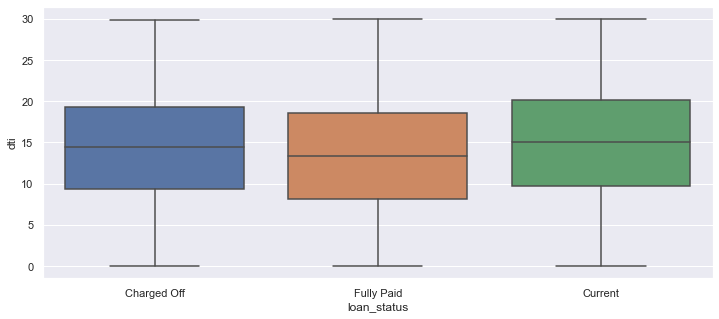

In [783]:
sns.boxplot(x=loan_df['loan_status'], y=loan_df['dti'])

In [784]:
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30])

<AxesSubplot:xlabel='dti_bin', ylabel='count'>

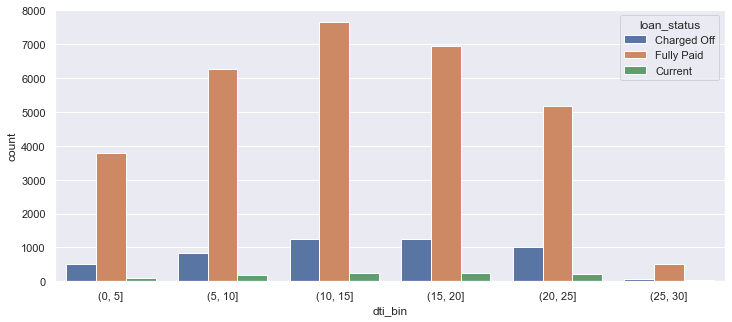

In [785]:
sns.countplot(x=loan_df.dti_bin, hue=loan_df.loan_status)

    > The analysis on dti shows that ,  higher the dti more chances of loan being charged off

> Field Revolving Balance 

<AxesSubplot:xlabel='revol_bal'>

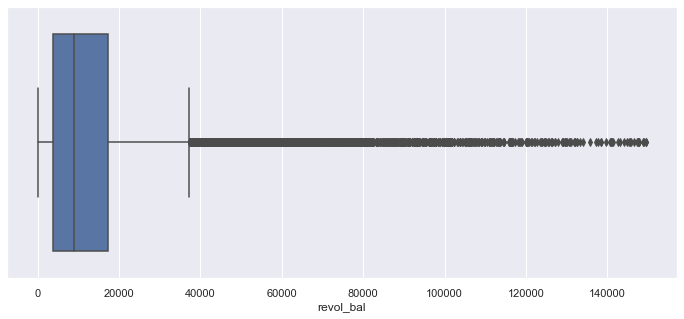

In [786]:
sns.boxplot(x=loan_df['revol_bal'])

In [787]:
loan_df.revol_bal.describe()

count    36433.000000
mean     13465.657481
std      15702.093047
min          0.000000
25%       3832.000000
50%       9030.000000
75%      17231.000000
max     149588.000000
Name: revol_bal, dtype: float64

C:\Users\dhiremath\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

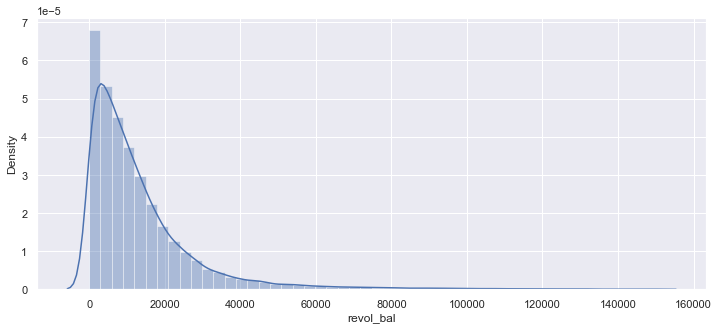

In [788]:
sns.distplot(loan_df.revol_bal)

<AxesSubplot:xlabel='revol_bal', ylabel='loan_status'>

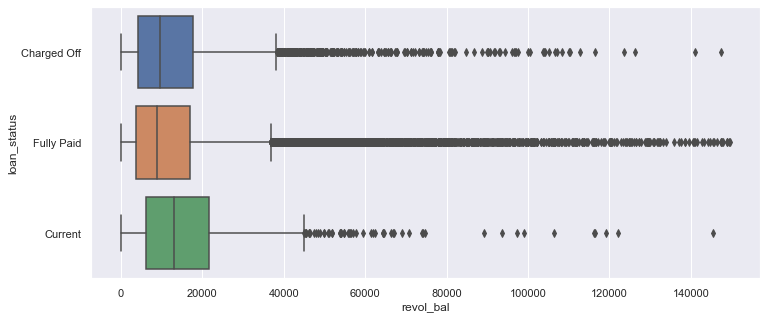

In [789]:
sns.boxplot(x=loan_df['revol_bal'], y=loan_df['loan_status'])

    > Revolving balance is alomost equal in case of charged off and fully paid loans, 
    > we feel it might not be a factor of loan charge offs

> Field 'pub_rec': Number of derogatory public records

In [790]:
loan_df.pub_rec.describe()

count   36433.000000
mean        0.053715
std         0.234995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: pub_rec, dtype: float64

<AxesSubplot:xlabel='pub_rec'>

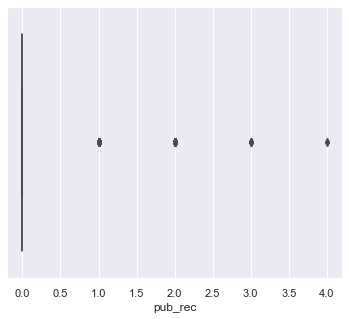

In [791]:
sns.set(rc={'figure.figsize':(6,5)})
sns.boxplot(x=loan_df.pub_rec)

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

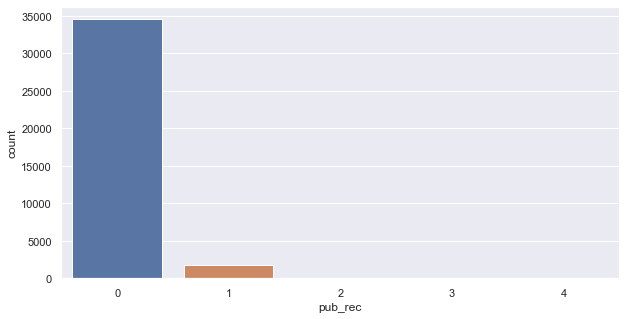

In [792]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=loan_df['pub_rec'])

In [793]:
percentage_chargedOff(loan_df, 'pub_rec')

pub_rec
0   13.157514
1   21.155943
2   21.276596
Name: pub_rec, dtype: float64

    > Number of deregoratory public records are 0, lending company has provided loans taking this care. They should continue doing this. 

> Field 'Term Months': The number of payments on the loan. Values are in months and can be either 36 or 60.

In [794]:
loan_df.term_months.describe()

count     36433
unique        2
top         36 
freq      26377
Name: term_months, dtype: object

<AxesSubplot:xlabel='term_months', ylabel='count'>

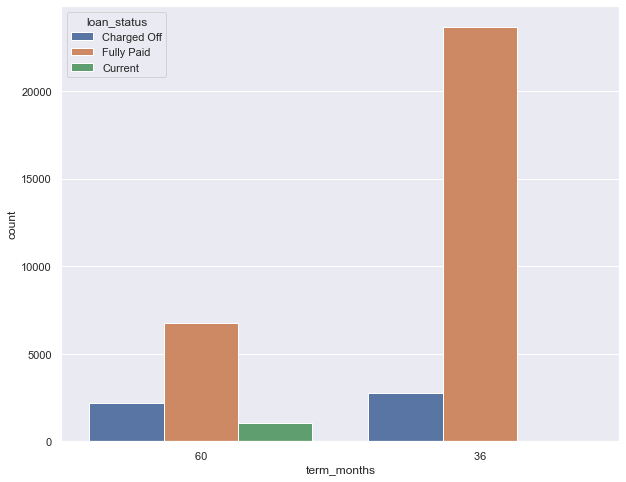

In [795]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=loan_df.term_months, hue=loan_df.loan_status)

In [796]:
percentage_chargedOff(loan_df, 'term_months')

term_months
 36    10.349926
 60    22.006762
Name: term_months, dtype: float64

    > percentage of defaulters in 60 months are 22%, more defaulters are found in higher term loans

<AxesSubplot:xlabel='purpose', ylabel='count'>

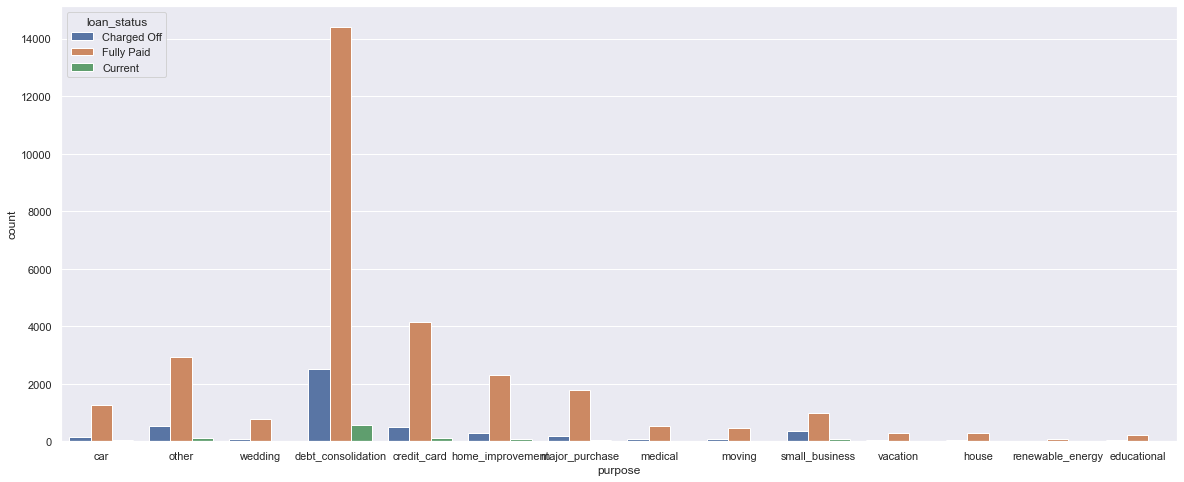

In [797]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=loan_df.purpose, hue=loan_df.loan_status)

> Field Total Payment : Payments received to date for total amount funded

In [798]:
loan_df.total_pymnt.describe()

count   36433.000000
mean    12310.968665
std      9048.420882
min        33.730000
25%      5672.560000
50%     10101.590000
75%     16700.720000
max     58563.680000
Name: total_pymnt, dtype: float64

C:\Users\dhiremath\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

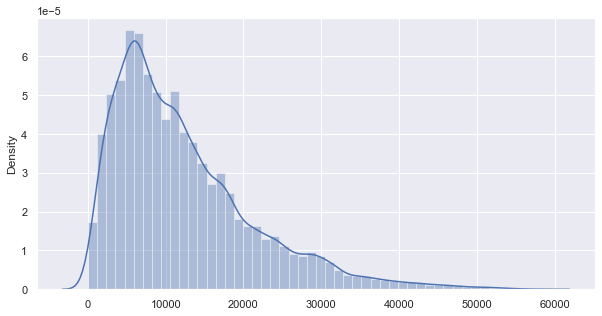

In [799]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(x=loan_df.total_pymnt)

<AxesSubplot:xlabel='total_pymnt', ylabel='loan_status'>

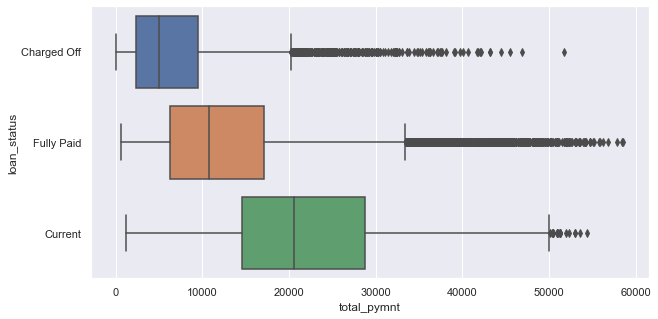

In [800]:
sns.boxplot(x=loan_df['total_pymnt'], y=loan_df['loan_status'])

    > The median shows that the amount received for charged off loans is less than full paid loans

> Field last_pymnt_amnt : Last total payment amount received.

In [801]:
loan_df.last_pymnt_amnt.describe()

count   36433.000000
mean     2742.955476
std      4473.528922
min         0.010000
25%       226.280000
50%       571.700000
75%      3457.580000
max     36115.200000
Name: last_pymnt_amnt, dtype: float64

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='loan_status'>

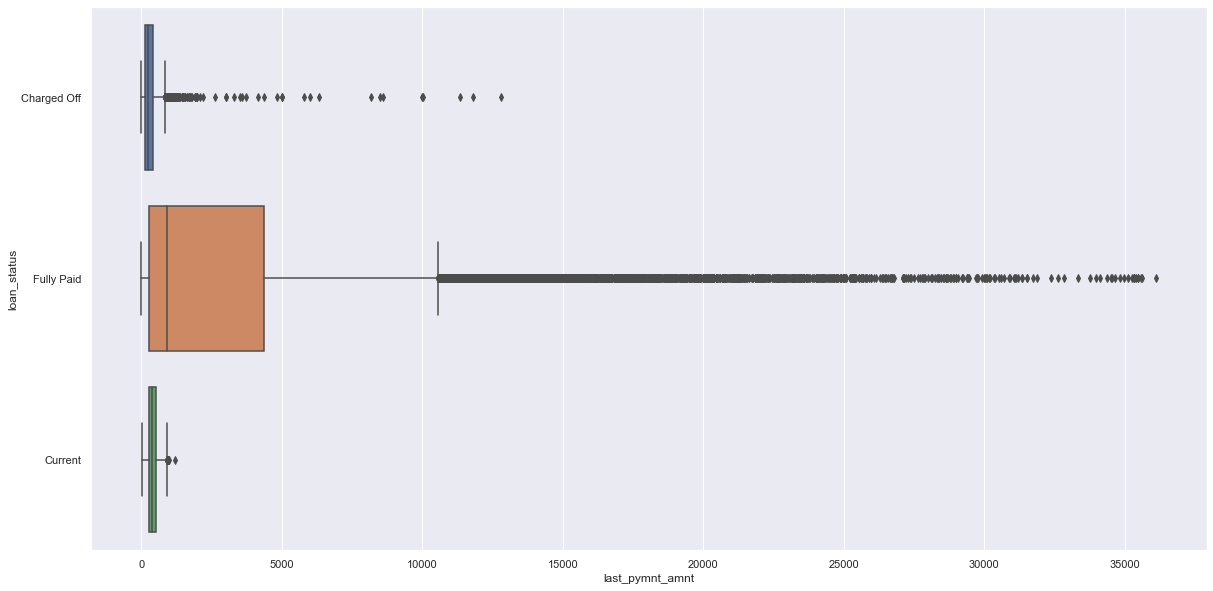

In [802]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=loan_df['last_pymnt_amnt'], y=loan_df['loan_status'])

    >In the last paid amount full paid are way higher than charged off, the amount received in case of charged off loans are less. 

#### Bivariate Analysis 

<AxesSubplot:xlabel='emp_length_years', ylabel='annual_inc'>

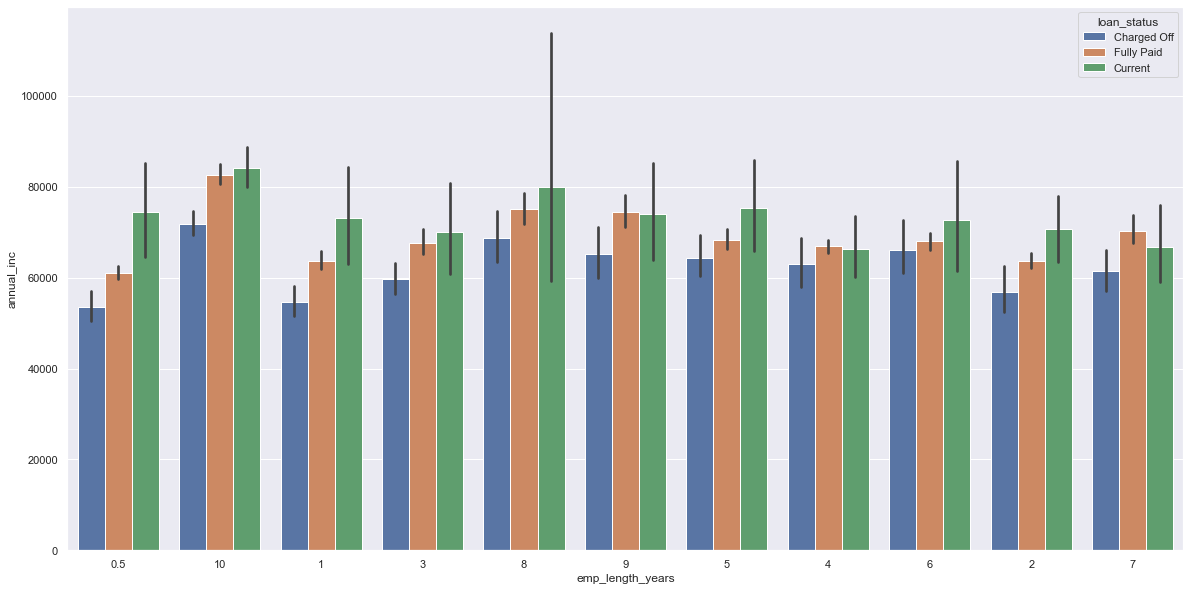

In [803]:
sns.barplot(x='emp_length_years', y='annual_inc', data=loan_df, hue=loan_df.loan_status)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='annual_inc'>

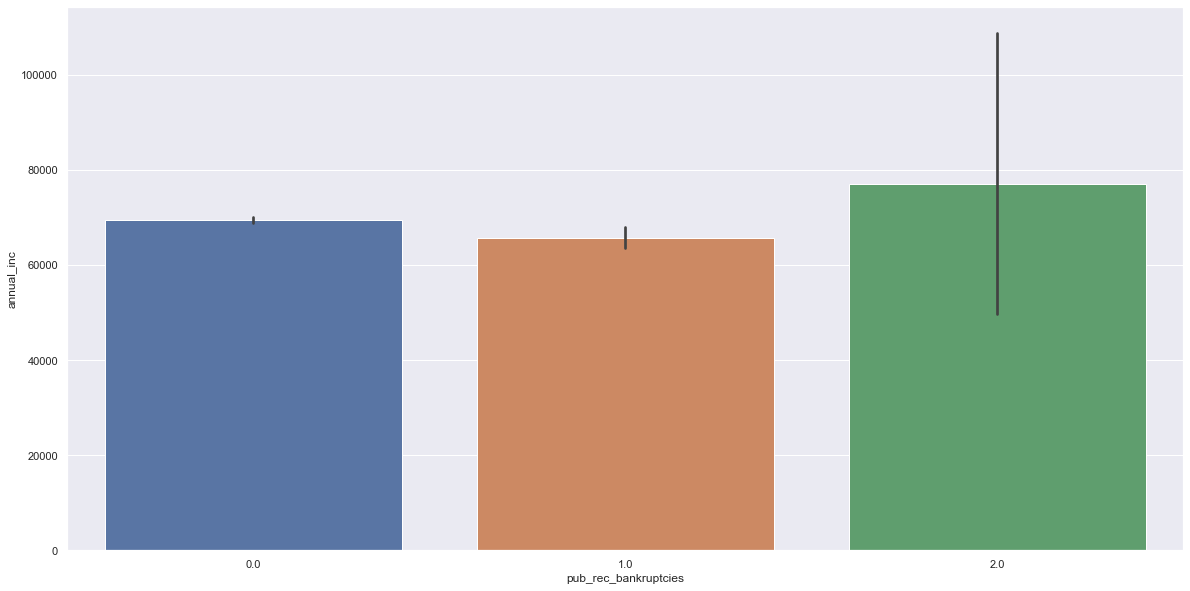

In [804]:
sns.barplot(x='pub_rec_bankruptcies', y='annual_inc', data=loan_df)

    > The annual income is higher and public bankruptcies is also higher

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='annual_inc'>

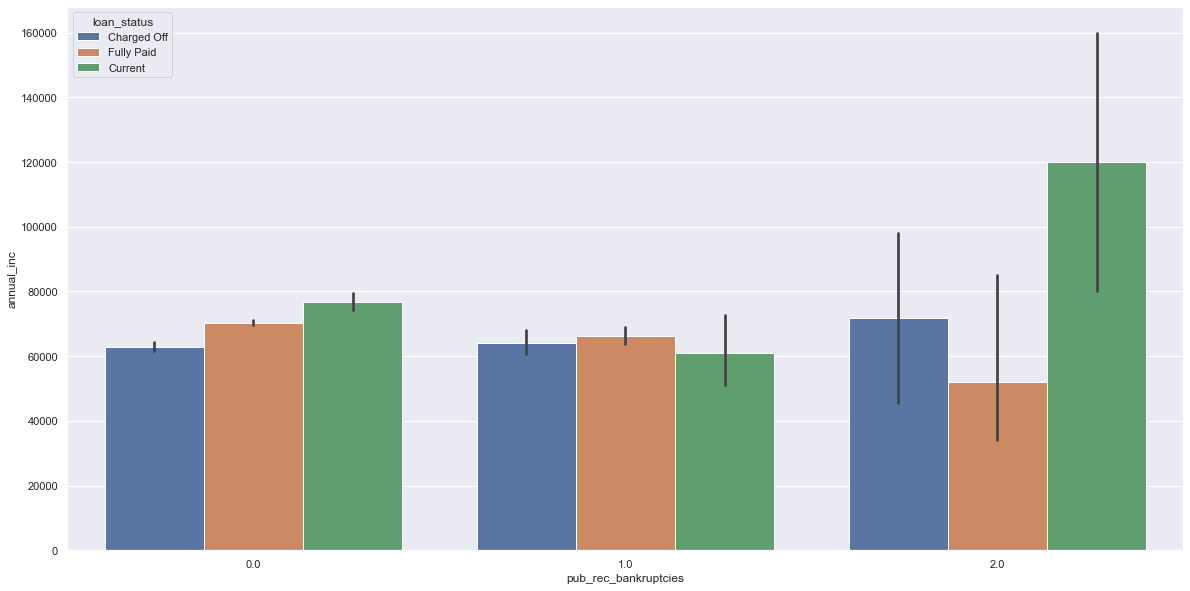

In [805]:
sns.barplot(x='pub_rec_bankruptcies', y='annual_inc', data=loan_df, hue=loan_df.loan_status)

    > Loan defaulters are higher if bankrupcies is higher than 1
    > Bank should be cautious while giving loans to borrowers with bankrupcies record

Field issue_d_year vs loan_status

In [806]:
loan_year_status = loan_df.groupby('issue_d_year')['loan_status'].count()

<AxesSubplot:title={'center':'Number of loans provided till year'}, xlabel='issue_d_year'>

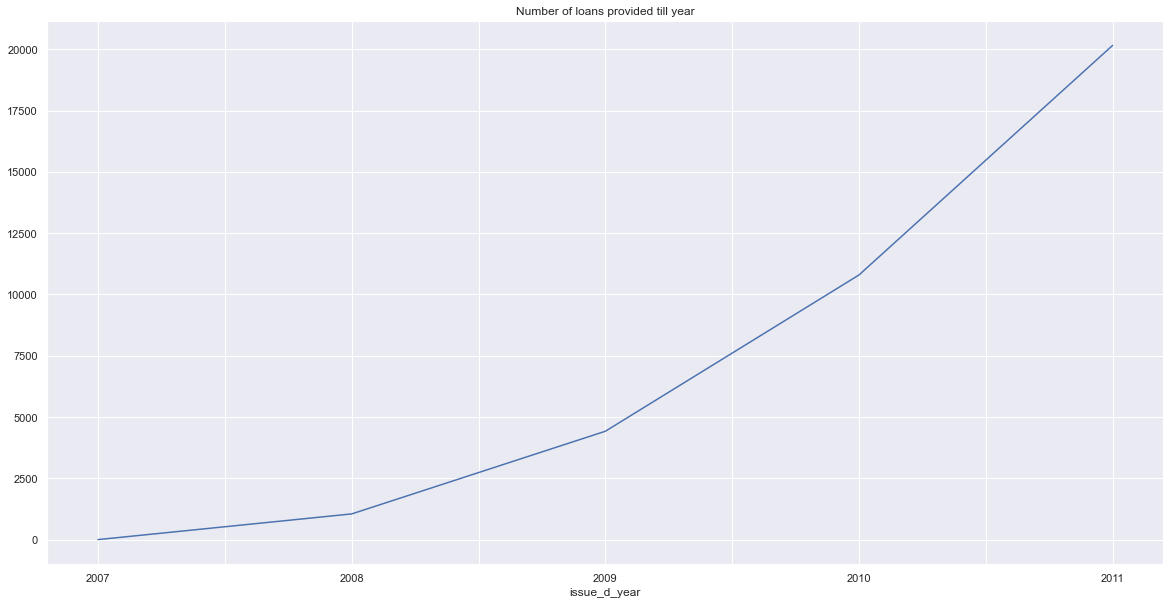

In [807]:
plt.title('Number of loans provided till year')
loan_year_status.plot.line()

        > Loan amount given to borrowers has increased year over year

In [808]:
loan_amount_chart = loan_df.groupby('issue_d_year')['loan_amnt'].median()

<AxesSubplot:xlabel='issue_d_year'>

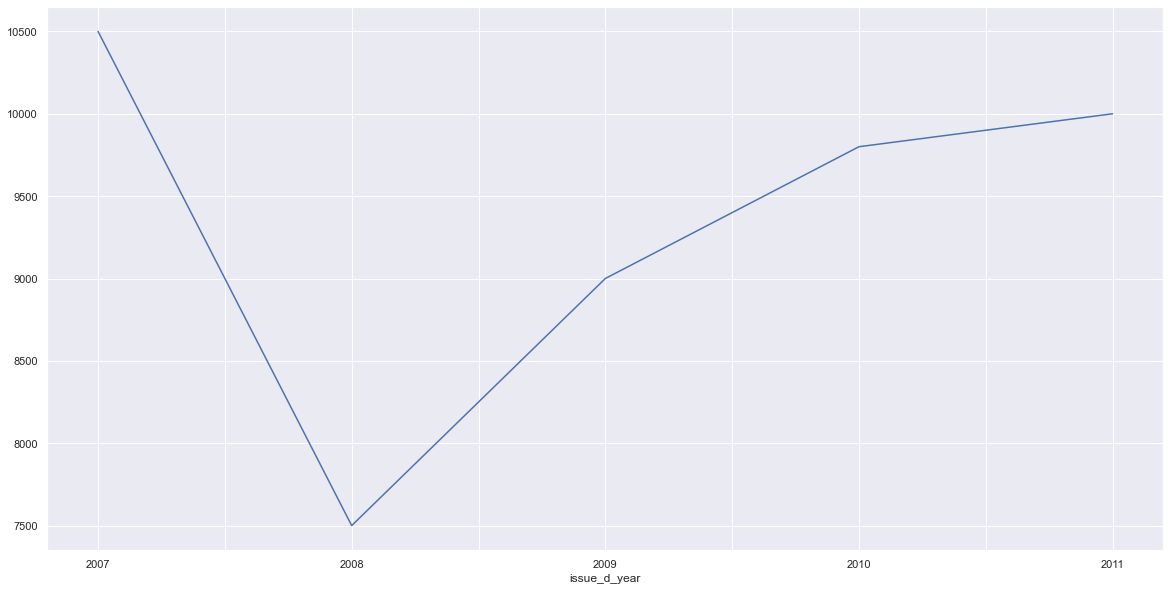

In [809]:
loan_amount_chart.plot.line()

    > The 2008 shows a dip in loans given, but after that it has increased year over year

> Fields annual income vs loan amount

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

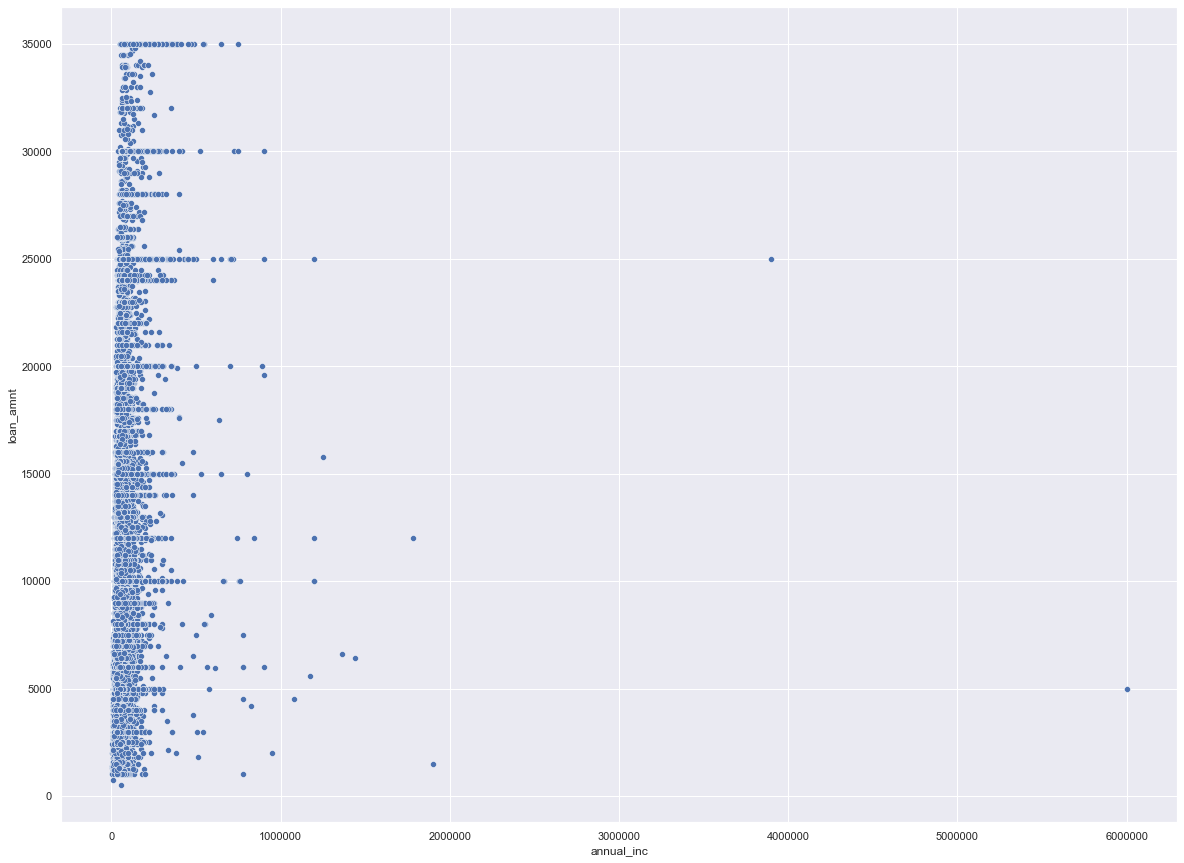

In [810]:
sns.set(rc={'figure.figsize':(20,15)})
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(x=loan_df.annual_inc, y=loan_df.loan_amnt)

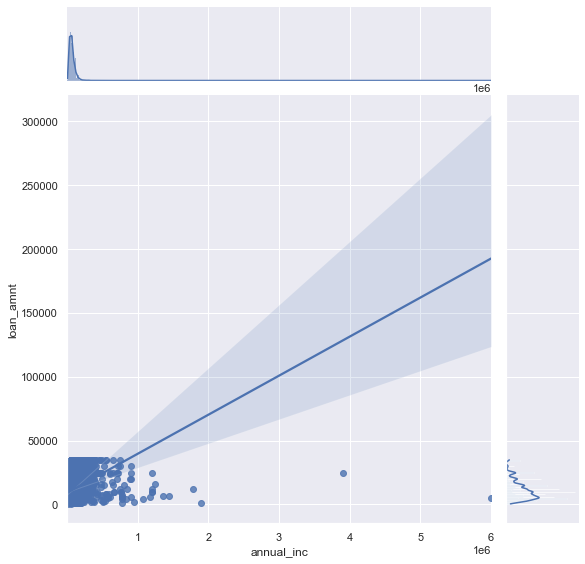

In [811]:
sns.set(rc={'figure.figsize':(20,15)})
sns.jointplot(x='annual_inc', y='loan_amnt', data=loan_df, kind='reg', height=8,  palette='cubehelix')

    > Above plot shows that borrowers with less than 20000 income are taking loans of 50000 or higher.  

Text(0, 0.5, 'Total Amount Recovered')

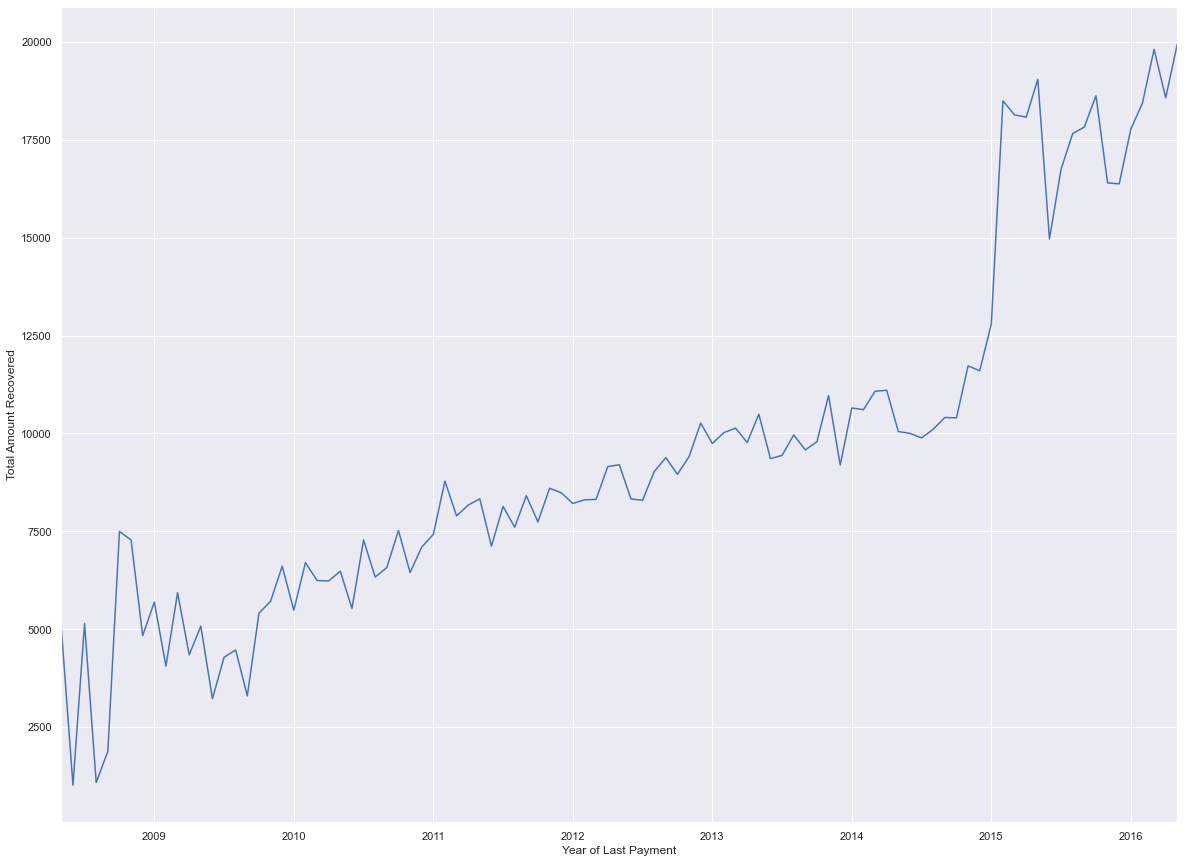

In [812]:
sns.set(rc={'figure.figsize':(20,15)})
loan_amount_recovered_chart = loan_df.groupby('last_pymnt_d')['total_pymnt'].median()
loan_amount_recovered_chart.plot.line()
plt.xlabel('Year of Last Payment')
plt.ylabel('Total Amount Recovered')

    > After 2014 loan recoveries have increased drastically !!!

> Fields: loan amount vs loan verified vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

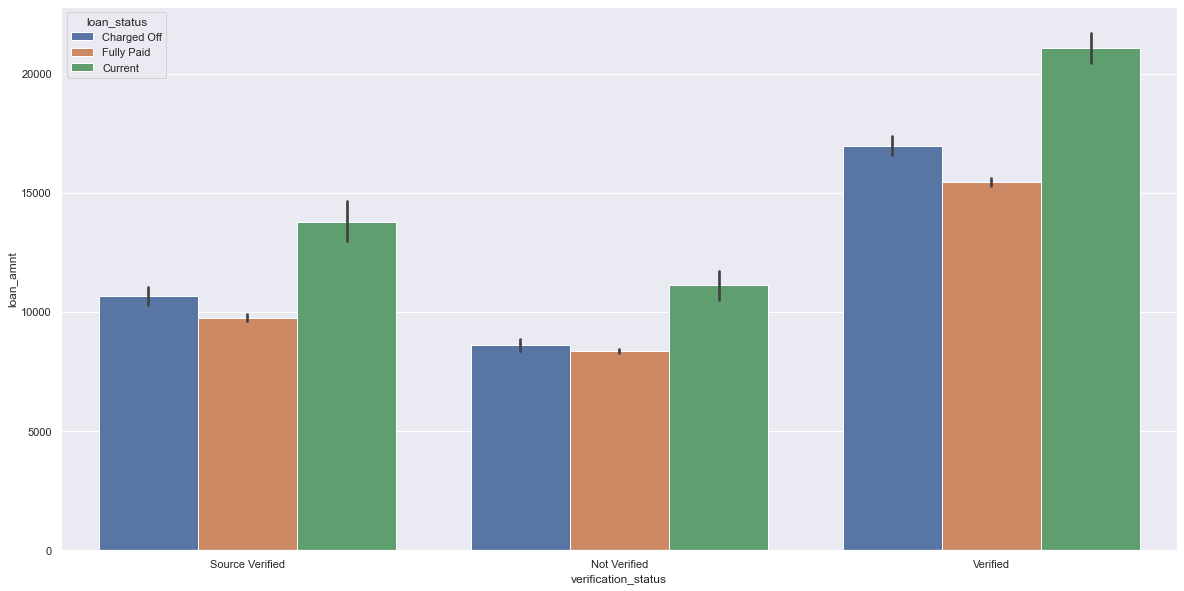

In [813]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=loan_df.verification_status, y=loan_df.loan_amnt, hue=loan_df.loan_status, data=loan_df)

    > In the above univariate analysis of verification stauts we found that charged off loans are more under not verified. 
    > Looks like if amount borrowed is higher then defaulters are also higher.

<AxesSubplot:xlabel='term_months', ylabel='loan_amnt'>

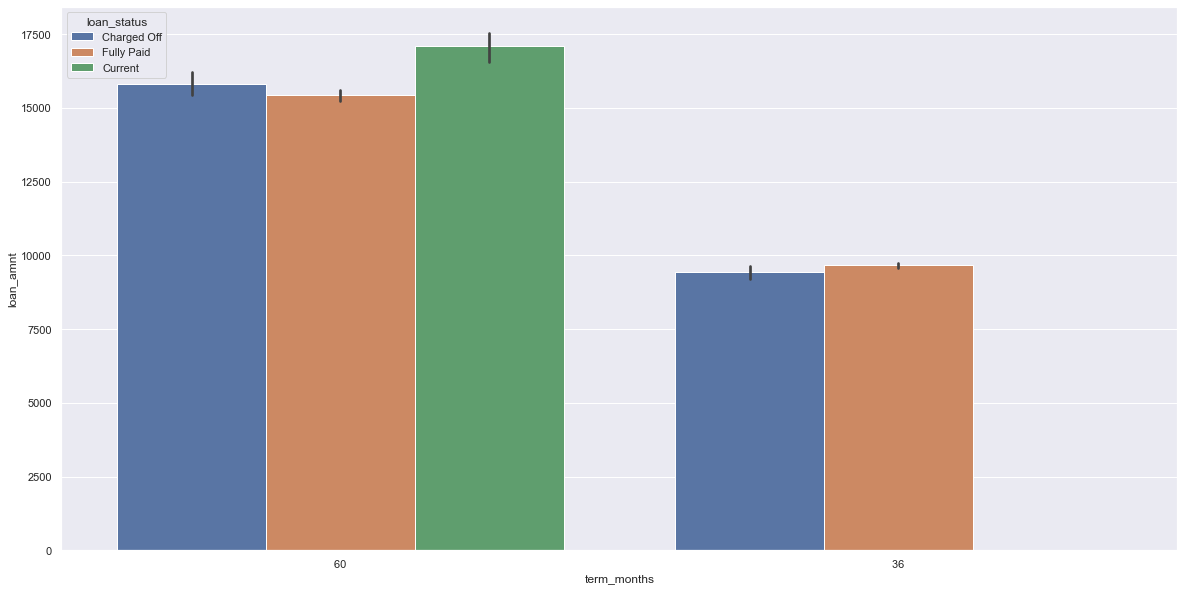

In [814]:
sns.barplot(x=loan_df.term_months, y=loan_df.loan_amnt, hue=loan_df.loan_status, data=loan_df)

> Lending company has given higher loans at higher tenure, it makes sense. 
> But Higher the tenure higher is the risk of repayment

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

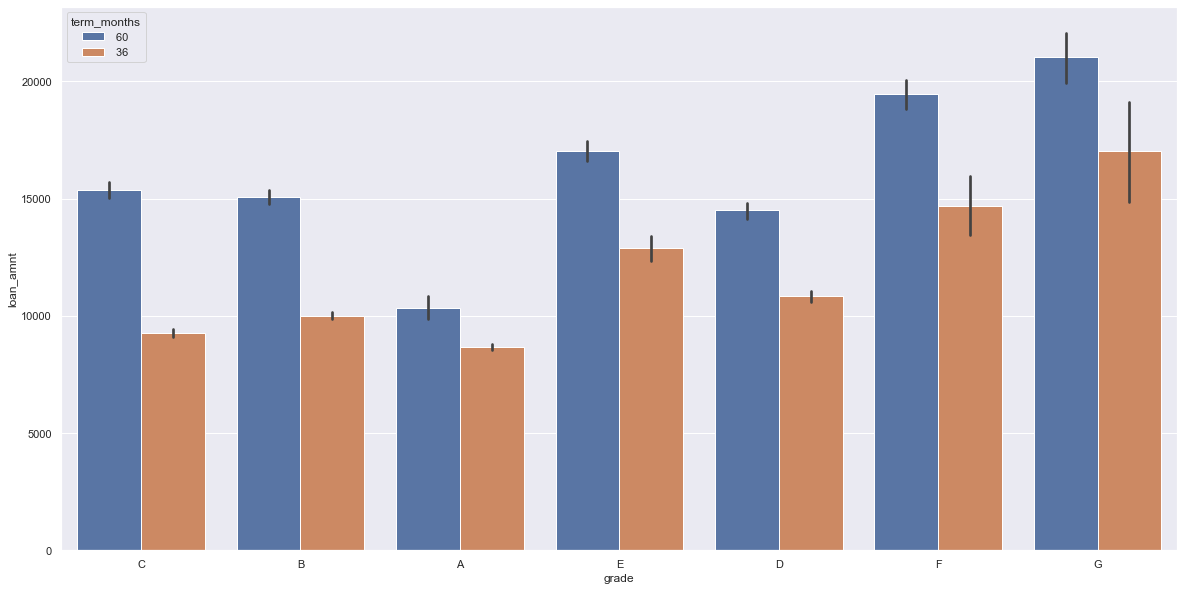

In [815]:
sns.barplot(x=loan_df.grade, y=loan_df.loan_amnt, hue=loan_df.term_months, data=loan_df)

> As we saw in previous plot that higher loans are at high risk, may be its because of loan grades. Higher loans are provided at higher grades, which is of higher interest

<AxesSubplot:>

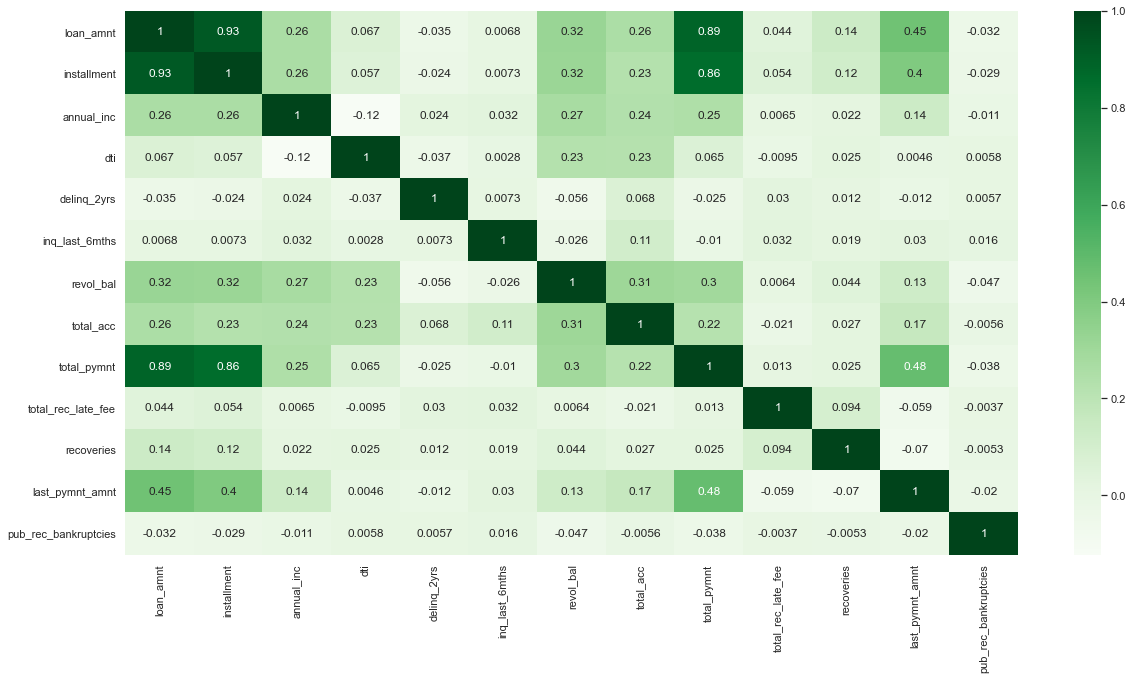

In [818]:
corelation_df = loan_df.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'pub_rec', 'open_acc'], axis=1)
corelation = corelation_df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap="Greens")

> DTI can be the major factor to approve a loan.
> Companies can check if the asked loan amount vs dti ratio is crossing 60% then lending loan should be stopped.

>>In the below formula I am trying to calculate if the given loans are good or bad based on 'dti'.
>> If loan amount given was greater than 60% of annual income - dti then the loan was a Bad loan else its a good loan.

In [822]:
loan_df['Loan_Good_Bad'] = np.where(((loan_df['annual_inc']*(0.6-loan_df['dti']))>=loan_df['loan_amnt']), 'Good', 'Bad')

<AxesSubplot:xlabel='Loan_Good_Bad', ylabel='count'>

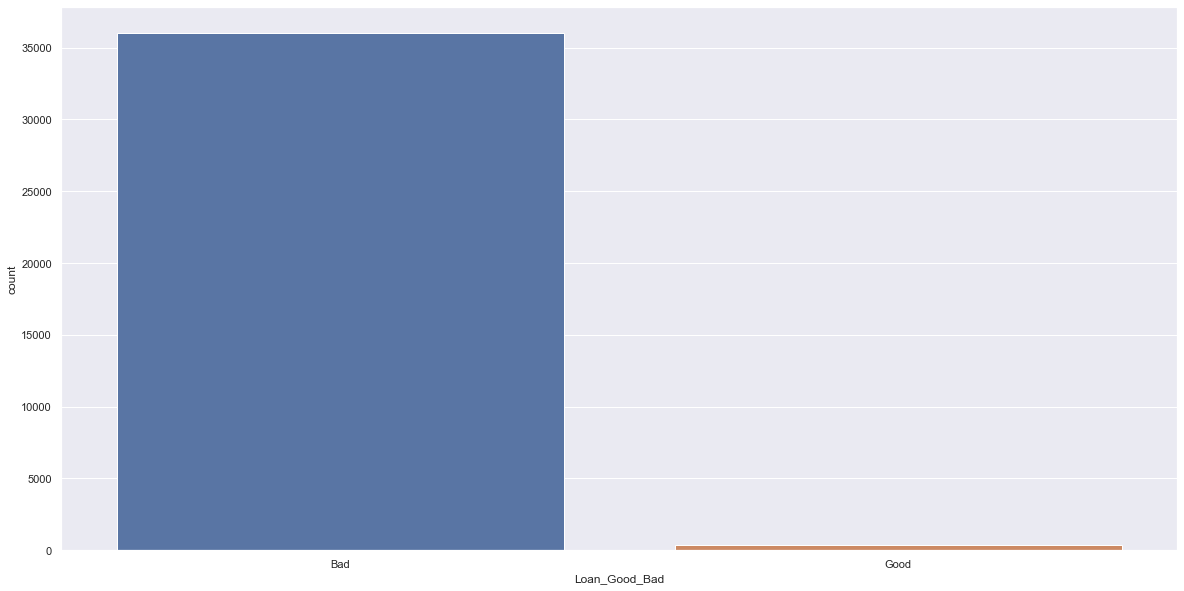

In [823]:
sns.countplot(x=loan_df.Loan_Good_Bad)

    > Looks like there were some loans crossing threshold

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

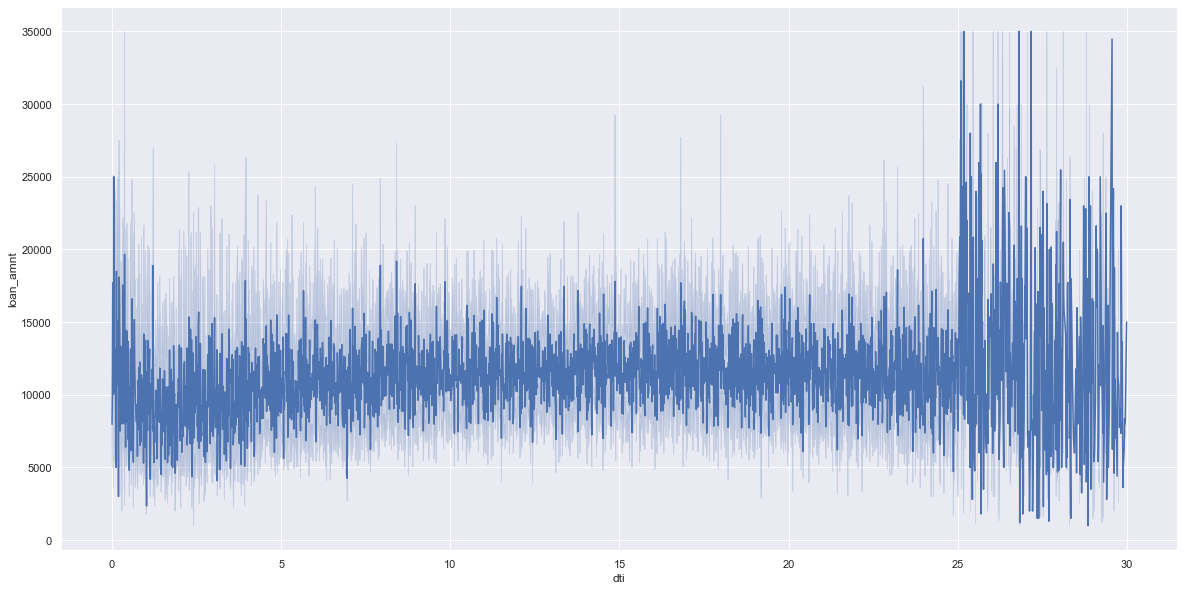

In [624]:
sns.lineplot(x=loan_df.dti, y=loan_df.loan_amnt)

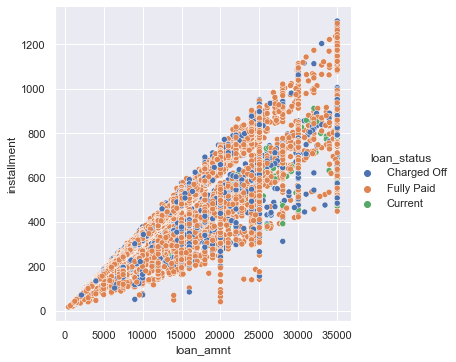

In [695]:
sns.relplot(x='loan_amnt', y='installment', data=loan_df, hue='loan_status')

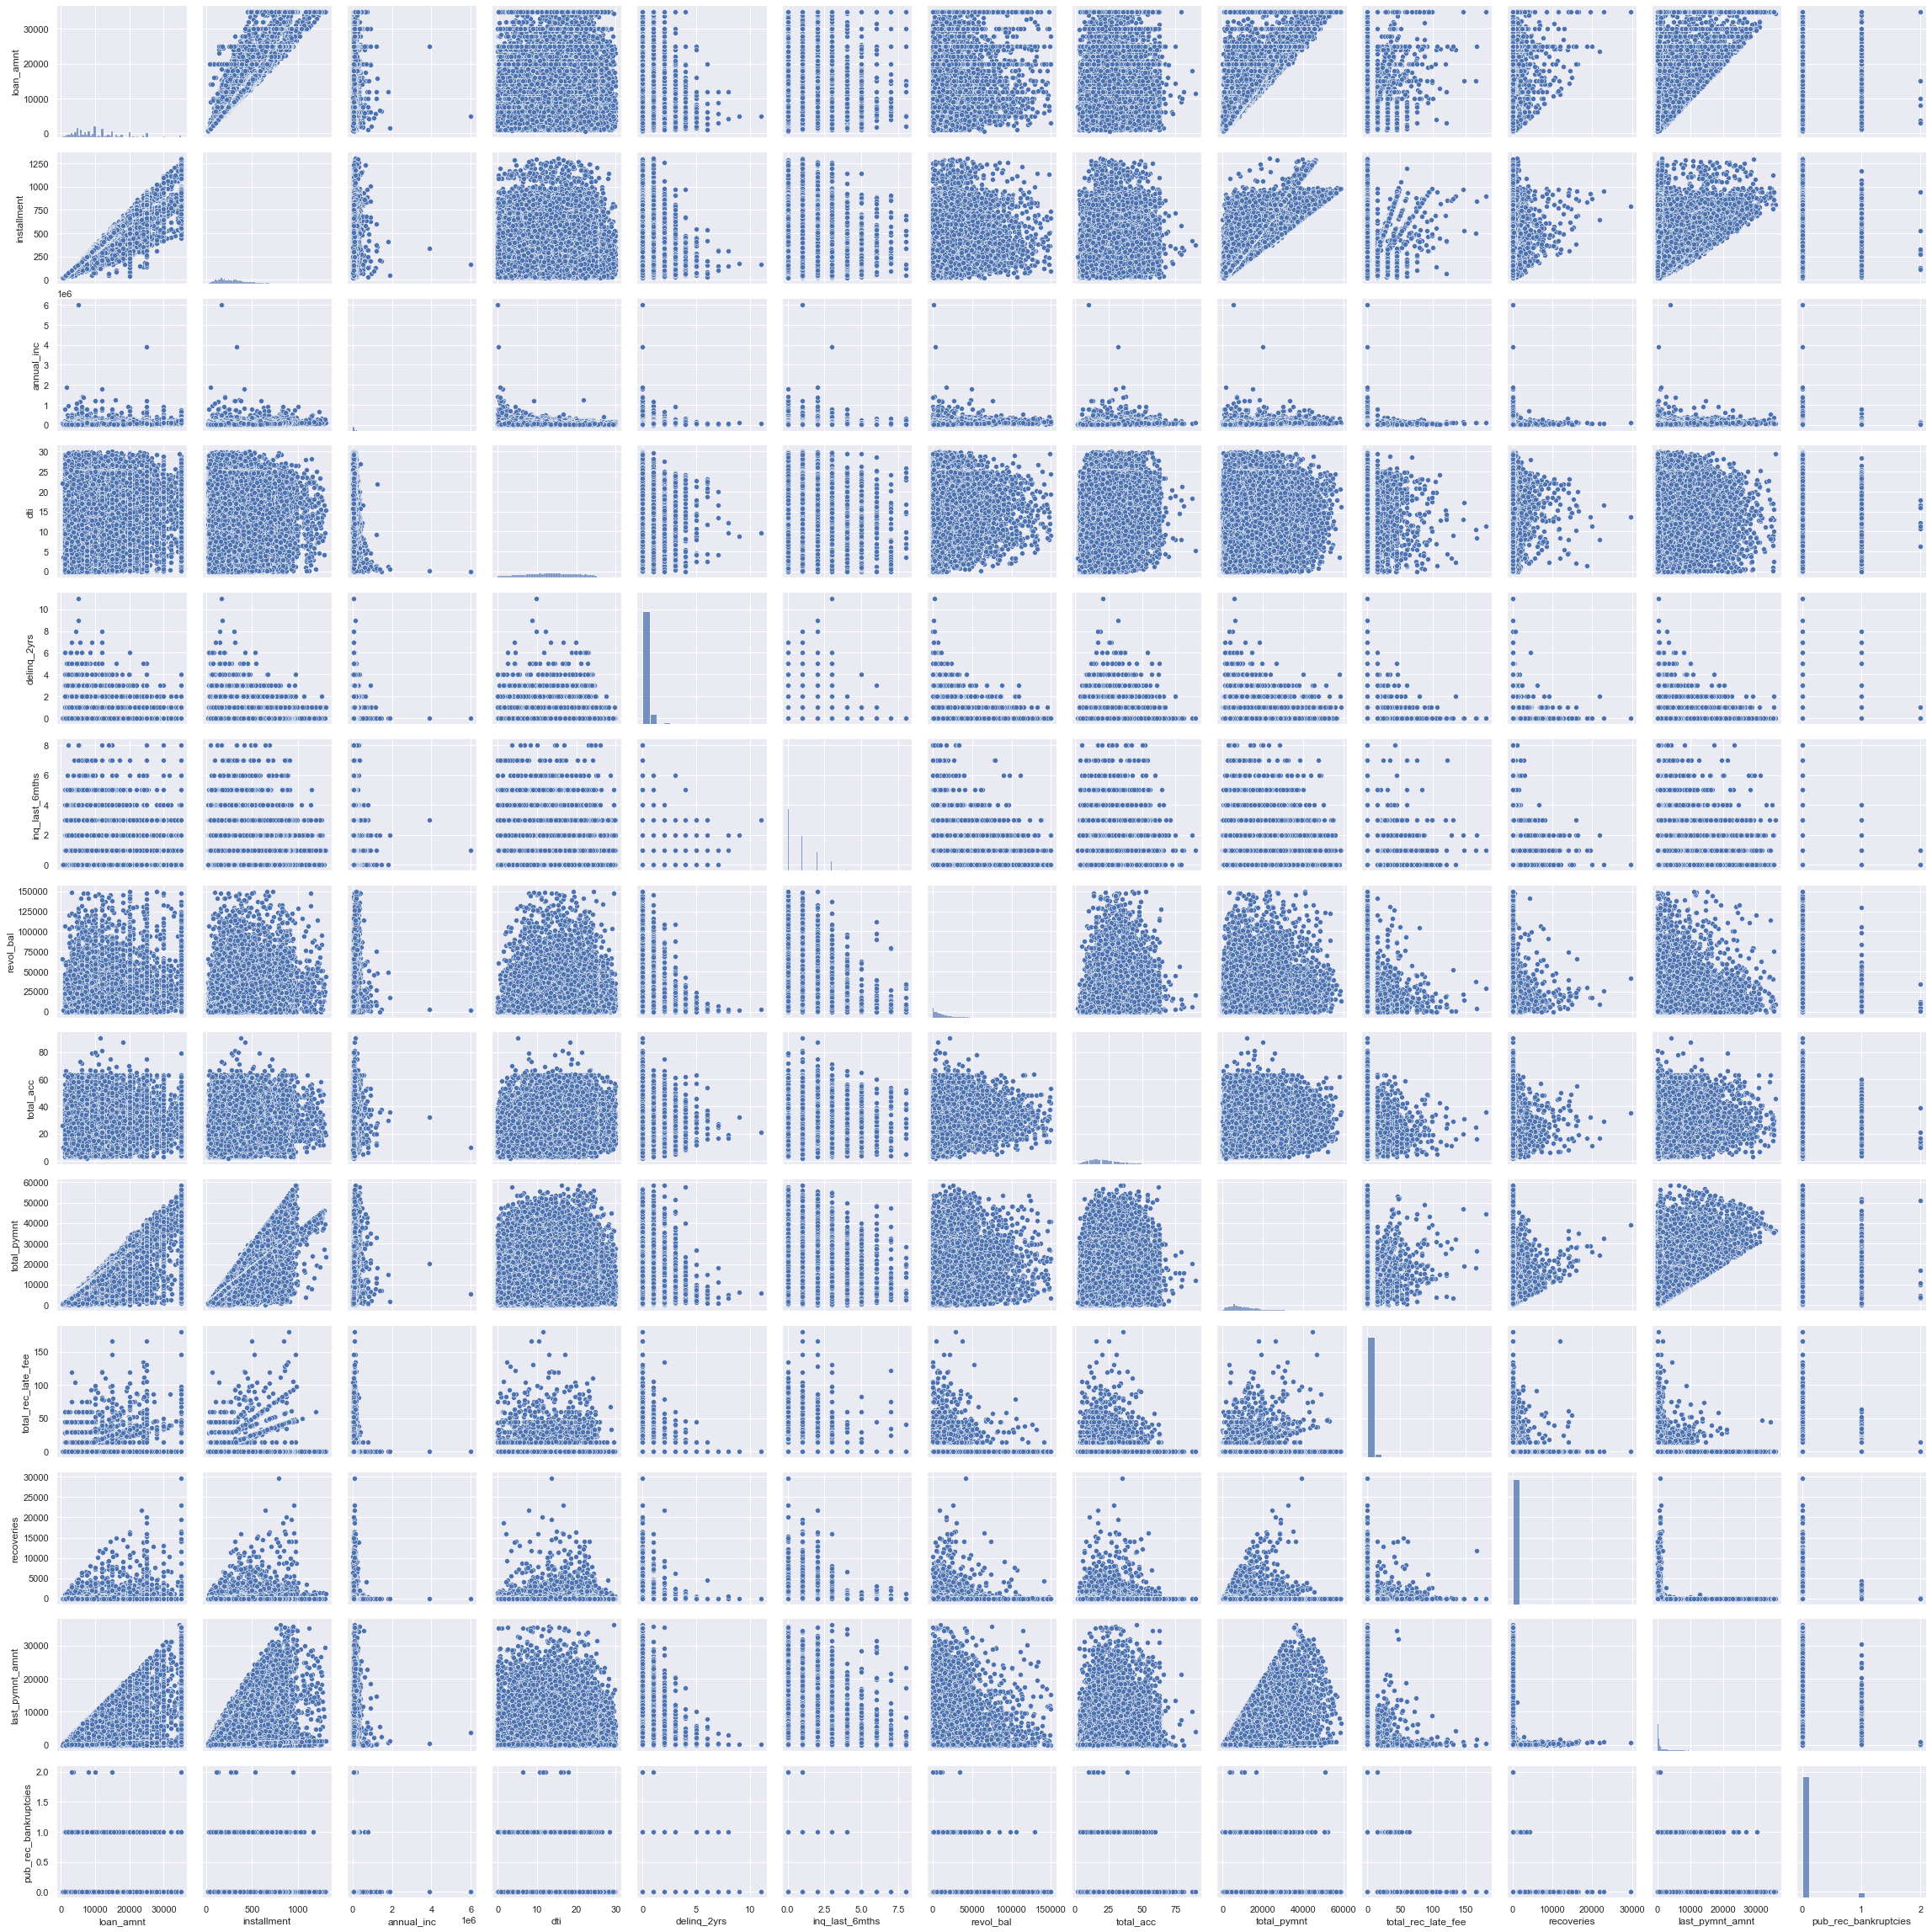

In [671]:
sns.pairplot(corelation_df)

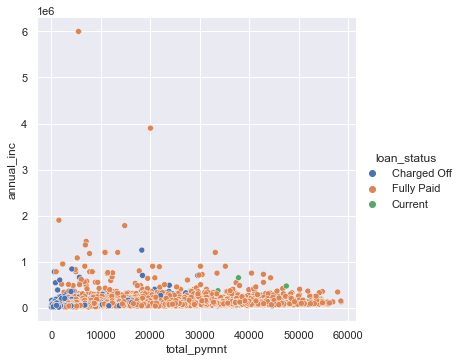

In [669]:
sns.set(rc={'figure.figsize':(15,10)})
sns.relplot(x='total_pymnt', y='annual_inc', data=loan_df, hue='loan_status')